# Predicting Airbnb Review Score ratings

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# File name of the  data sets
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")



df = pd.read_csv(airbnbDataSet_filename)

print(df.columns)

df.to_csv('my_data.csv', index=False)



Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [3]:
df.drop(columns=['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'amenities', 'host_about'], inplace=True)

###  Define Your ML Problem


1. I am using the Airbnb listings dataset
2. I will be predicting the guest review score of a listing.
Label - review_scores_value
The target label is a continuous numeric value
3. Type of Machine Learning Problem.
This is a supervised machine learning problem since I am  training the model on known input features and known output labels.
Also, the problem is a regression problem, since the label is a continuous number, not categories or classes
4. Features
- I am currently using all the columns of the data (excluding the target llabel column (reviews_scores_ratings) and these 'name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'amenities', 'host_about'). 

5. Why it is an important problem
Predicting the reviews score can help companies like airbnb to accurately predicting listing quality leads to better guest experiences, improved platform trust, and higher revenue.

Predicting review_scores_rating helps identify listings likely to provide a poor guest experience, allowing the platform to step in early and do better suggestions for customers, in order to ensure customer satisfaction and retention in the business.

Moreover, predicting the the reviews_scores_rating  can help companies in search rankings so that higher review scores can be promoted in search results, improving trust and conversion rates.

Also, predicting this value can help to coach some hosts so that hosts with predicted low ratings can be given tips or required improvements to avoid negative experiences.

Lastly, ensuring high-quality stays increases customer return rates, reduces refund requests, and can help  brand reputation.



# Data Inspection

In [4]:
rows = df.shape[0]
cols = df.shape[1]

print(rows)
print(cols)

print(df.columns)
df.head(10)

28022
43
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_en

host_response_rate  host_acceptance_rate  host_is_superhost  \
0                0.80                  0.17               True   
1                0.09                  0.69               True   
2                1.00                  0.25               True   
3                1.00                  1.00               True   
4                 NaN                   NaN               True   
5                1.00                  1.00               True   
6                1.00                  1.00               True   
7                1.00                  1.00               True   
8                1.00                  0.00               True   
9                1.00                  0.99               True   

   host_listings_count  host_total_listings_count  host_has_profile_pic  \
0                  8.0                        8.0                  True   
1                  1.0                        1.0                  True   
2                  1.0                        1.0                  True   
3                  1.0                        1.0                  True   
4                  1.0                        1.0                  True   
5                  3.0                        3.0                  True   
6                  1.0                        1.0                  True   
7                  3.0                        3.0                  True   
8                  2.0                        2.0                  True   
9                  1.0                        1.0                  True   

   host_identity_verified neighbourhood_group_cleansed        room_type  \
0                    True                    Manhattan  Entire home/apt   
1                    True                     Brooklyn  Entire home/apt   
2                    True                     Brooklyn  Entire home/apt   
3                    True                    Manhattan     Private room   
4                    True                    Manhattan     Private room   
5                    True                     Brooklyn     Private room   
6                    True                     Brooklyn  Entire home/apt   
7                    True                    Manhattan     Private room   
8                    True                     Brooklyn     Private room   
9                    True                     Brooklyn  Entire home/apt   

   accommodates  ...  review_scores_communication  review_scores_location  \
0             1  ...                         4.79                    4.86   
1             3  ...                         4.80                    4.71   
2             4  ...                         5.00                    4.50   
3             2  ...                         4.42                    4.87   
4             1  ...                         4.95                    4.94   
5             2  ...                         4.82                    4.87   
6             3  ...                         4.80                    4.67   
7             1  ...                         4.95                    4.84   
8             1  ...                         5.00                    5.00   
9             4  ...                         4.91                    4.93   

   review_scores_value  instant_bookable  calculated_host_listings_count  \
0                 4.41             False                               3   
1                 4.64             False                               1   
2                 5.00             False                               1   
3                 4.36             False                               1   
4                 4.92             False                               1   
5                 4.73             False                               3   
6                 4.57              True                               1   
7                 4.84              True                               1   
8                 5.00             False                               2   
9               

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            16179 non-null  float64
 1   host_acceptance_rate                          16909 non-null  float64
 2   host_is_superhost                             28022 non-null  bool   
 3   host_listings_count                           28022 non-null  float64
 4   host_total_listings_count                     28022 non-null  float64
 5   host_has_profile_pic                          28022 non-null  bool   
 6   host_identity_verified                        28022 non-null  bool   
 7   neighbourhood_group_cleansed                  28022 non-null  object 
 8   room_type                                     28022 non-null  object 
 9   accommodates                                  28022 non-null 

In [6]:
df.describe(include='all')

host_response_rate  host_acceptance_rate host_is_superhost  \
count         16179.000000          16909.000000             28022   
unique                 NaN                   NaN                 1   
top                    NaN                   NaN              True   
freq                   NaN                   NaN             28022   
mean              0.906901              0.791953               NaN   
std               0.227282              0.276732               NaN   
min               0.000000              0.000000               NaN   
25%               0.940000              0.680000               NaN   
50%               1.000000              0.910000               NaN   
75%               1.000000              1.000000               NaN   
max               1.000000              1.000000               NaN   

        host_listings_count  host_total_listings_count host_has_profile_pic  \
count          28022.000000               28022.000000                28022   
unique                  NaN                        NaN                    1   
top                     NaN                        NaN                 True   
freq                    NaN                        NaN                28022   
mean              14.554778                  14.554778                  NaN   
std              120.721287                 120.721287                  NaN   
min                0.000000                   0.000000                  NaN   
25%                1.000000                   1.000000                  NaN   
50%                1.000000                   1.000000                  NaN   
75%                3.000000                   3.000000                  NaN   
max             3387.000000                3387.000000                  NaN   

       host_identity_verified neighbourhood_group_cleansed        room_type  \
count                   28022                        28022            28022   
unique                      1                            5                4   
top                      True                    Manhattan  Entire home/apt   
freq                    28022                        11639            15604   
mean                      NaN                          NaN              NaN   
std                       NaN                          NaN              NaN   
min                       NaN                          NaN              NaN   
25%                       NaN                          NaN              NaN   
50%                       NaN                          NaN              NaN   
75%                       NaN                          NaN              NaN   
max                       NaN                          NaN              NaN   

        accommodates  ...  review_scores_communication  \
count   28022.000000  ...                 28022.000000   
unique           NaN  ...                          NaN   
top              NaN  ...                          NaN   
freq             NaN  ...                          NaN   
mean        2.874491  ...                     4.808041   
std         1.860251  ...                     0.464585   
min         1.000000  ...                     0.000000   
25%         2.000000  ...                     4.810000   
50%         2.000000  ...                     4.970000   
75%         4.000000  ...                     5.000000   
max        16.000000  ...                     5.000000   

        review_scores_location  review_scores_value  instant_bookable  \
count             28022.000000         28022.000000             28022   
unique                     NaN                  NaN                 2   
top                        NaN                  NaN             False   
freq                       NaN                  NaN             20382   
mean                  4.750393             4.647670               NaN   
std                   0.415717             0.518023               NaN   
min                   0.000000             0.000000          

In [7]:
missing_counts = df.isnull().sum()
missing_counts


host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights      

In [8]:
df.dtypes

host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                    int64
maximum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          

# Encode the categorical features to better visualize the data

In [9]:
to_encode = df.select_dtypes(include='object').columns.tolist()

to_encode

['neighbourhood_group_cleansed', 'room_type']

# Get the unique values in the encoded columns

In [10]:
unique_counts = df[to_encode].nunique()

unique_counts

neighbourhood_group_cleansed    5
room_type                       4
dtype: int64

### Perform one hot encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)
df_encoded = pd.DataFrame(enc.fit_transform(df[to_encode]))


df_encoded.columns = enc.get_feature_names_out(to_encode)

df_encoded.head()



neighbourhood_group_cleansed_Bronx  neighbourhood_group_cleansed_Brooklyn  \
0                                 0.0                                    0.0   
1                                 0.0                                    1.0   
2                                 0.0                                    1.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   neighbourhood_group_cleansed_Manhattan  \
0                                     1.0   
1                                     0.0   
2                                     0.0   
3                                     1.0   
4                                     1.0   

   neighbourhood_group_cleansed_Queens  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   

   neighbourhood_group_cleansed_Staten Island  room_type_Entire home/apt  \
0                                         0.0                        1.0   
1                                         0.0                        1.0   
2                                         0.0                        1.0   
3                                         0.0                        0.0   
4                                         0.0                        0.0   

   room_type_Hotel room  room_type_Private room  room_type_Shared room  
0                   0.0                     0.0                    0.0  
1                   0.0                     0.0                    0.0  
2                   0.0                     0.0                    0.0  
3                   0.0                     1.0                    0.0  
4                   0.0                     1.0                    0.0

### Merge the encoded data frame to the main one

In [12]:
df = df.drop(columns=to_encode)

df = df.join(df_encoded)

df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_r

### Define Label


In [13]:
target = df['review_scores_value']
target

0        4.41
1        4.64
2        5.00
3        4.36
4        4.92
         ... 
28017    1.00
28018    5.00
28019    2.00
28020    5.00
28021    5.00
Name: review_scores_value, Length: 28022, dtype: float64

In [14]:
target.dtype

dtype('float64')

### Features

In [15]:
features = list(df.drop(columns=['host_is_superhost']).columns)
features

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_total_listings_count',
 'host_has_profile_pic',
 'host_identity_verified',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month',
 'n_host_verificati

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


### visualize the features to detect outliers

In [17]:

def detect_outliers_visualization(feature):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


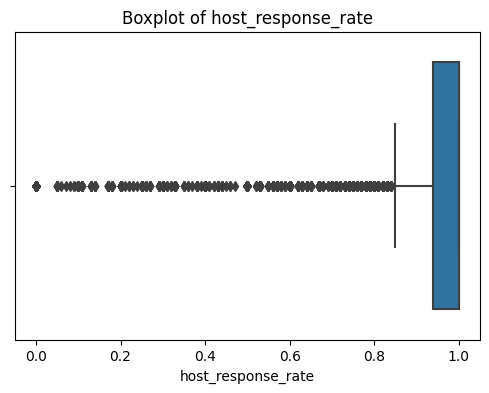

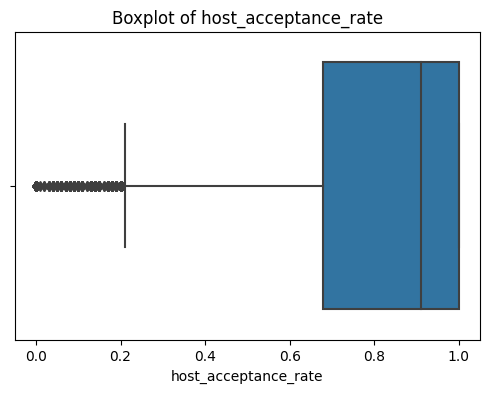

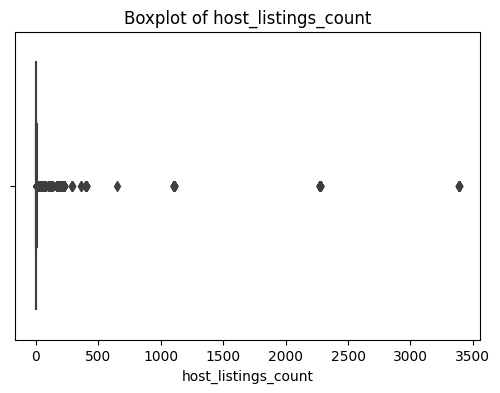

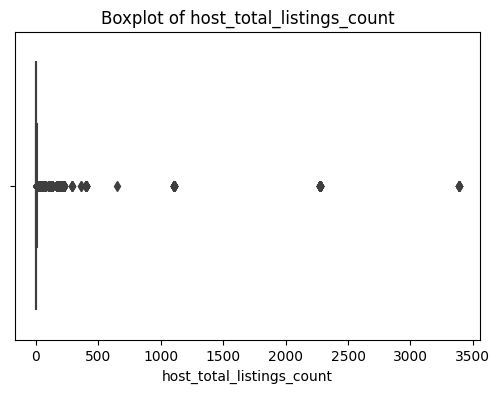

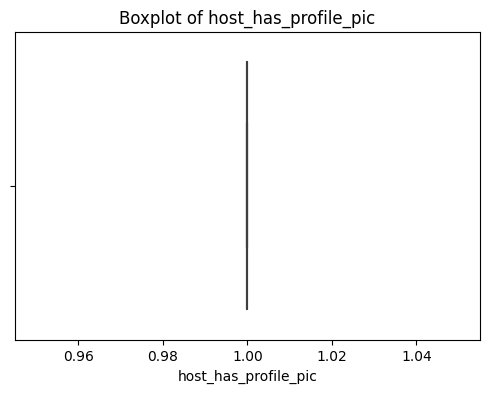

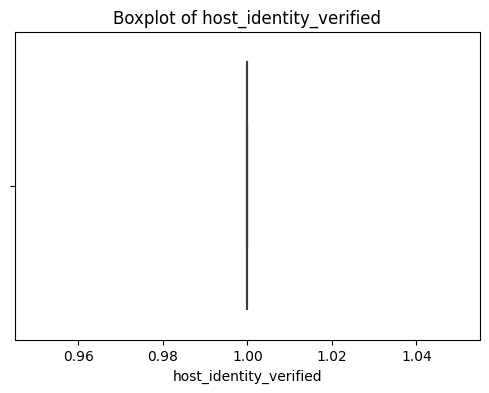

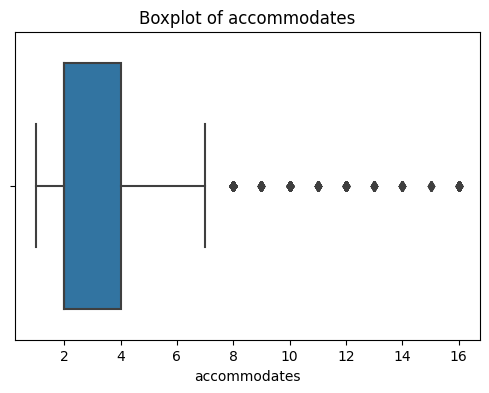

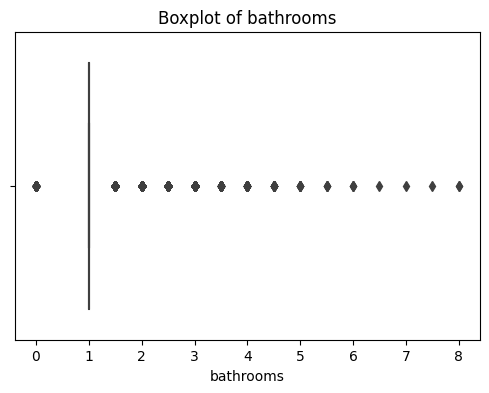

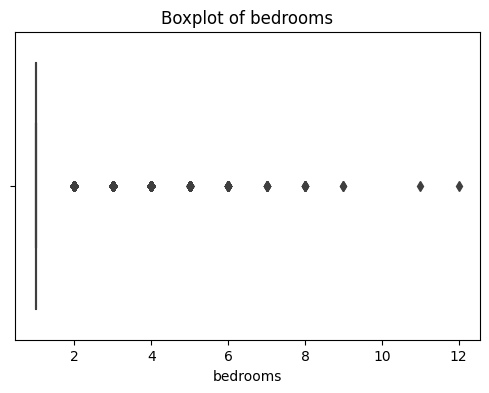

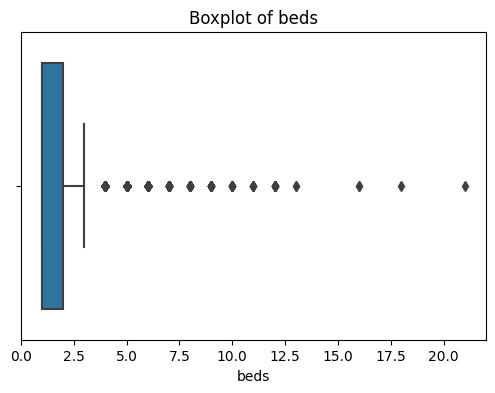

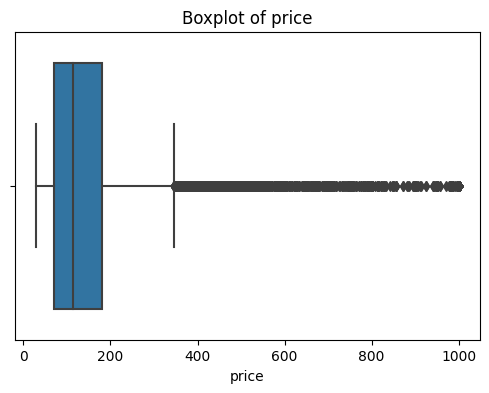

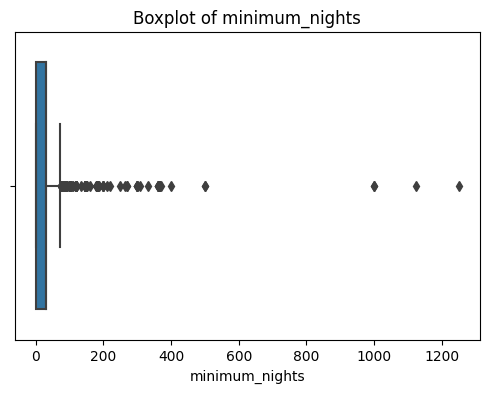

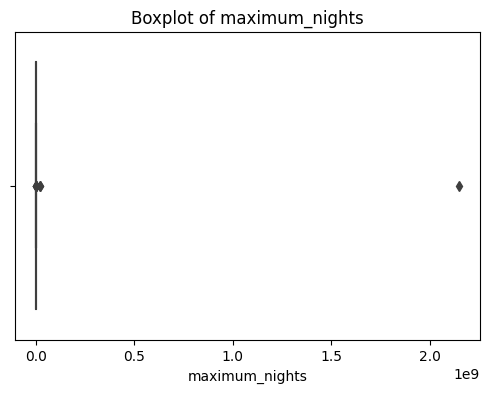

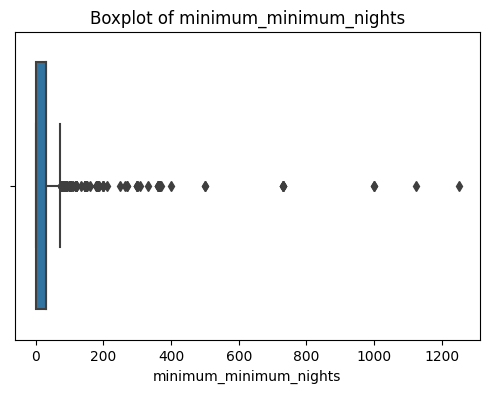

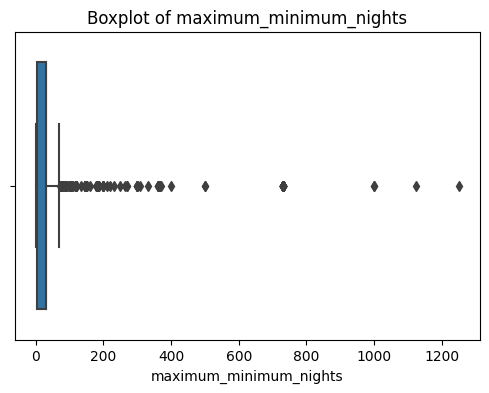

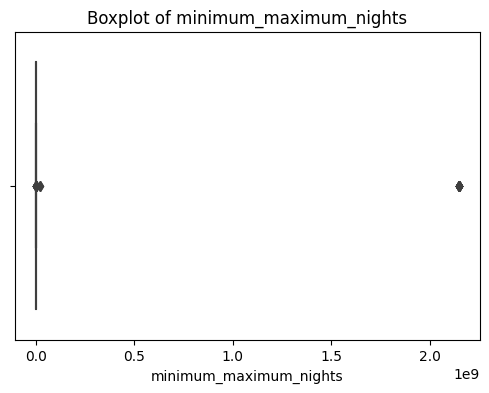

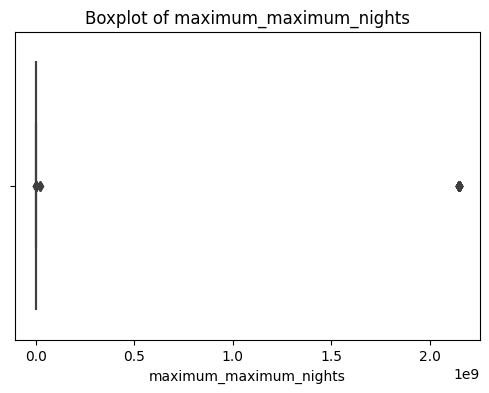

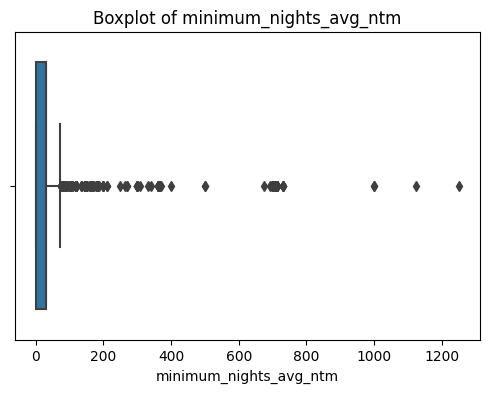

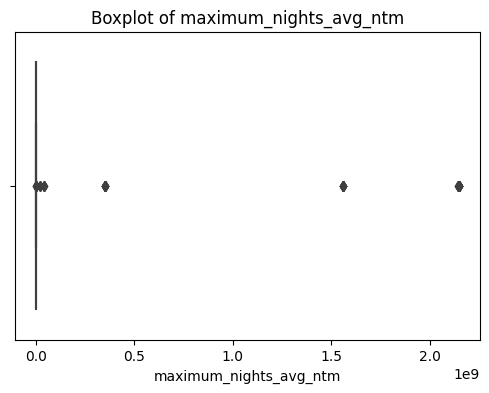

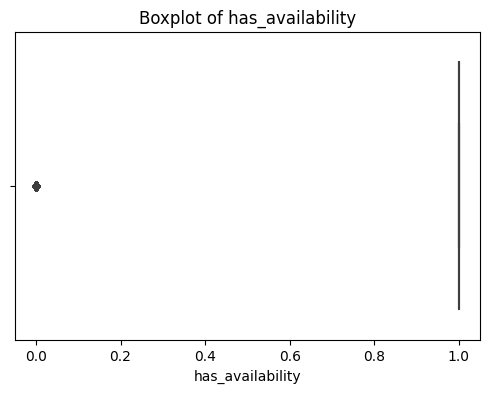

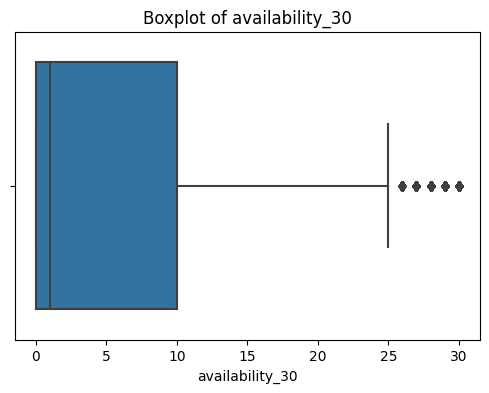

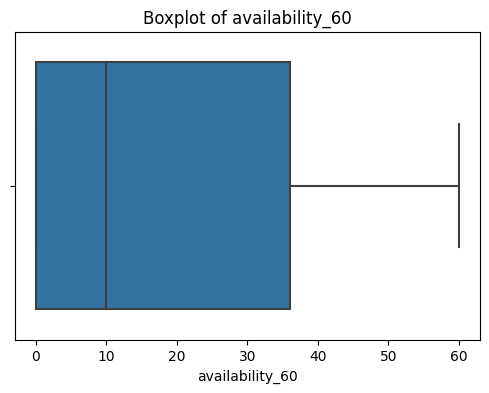

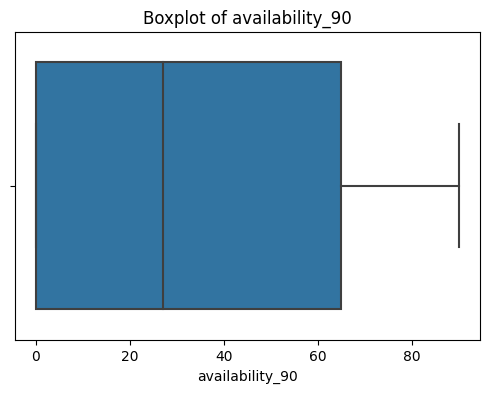

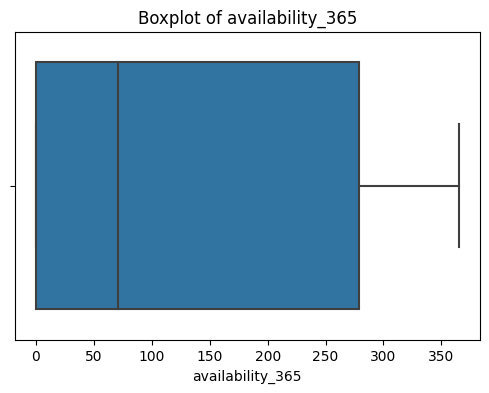

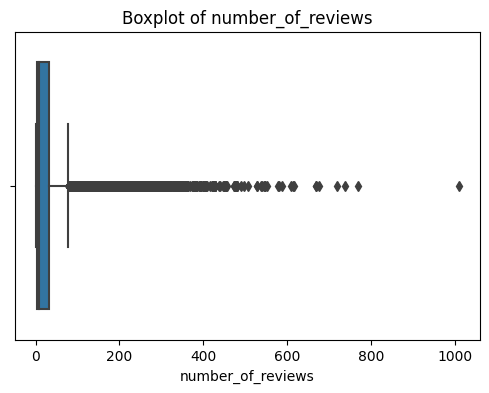

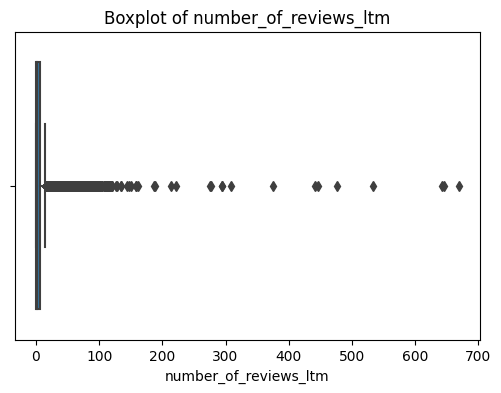

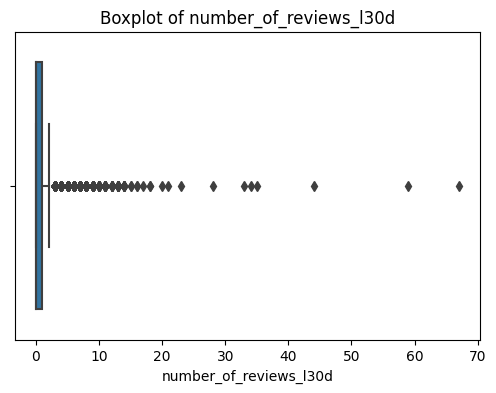

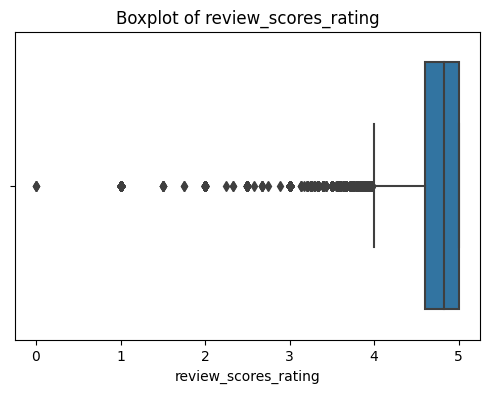

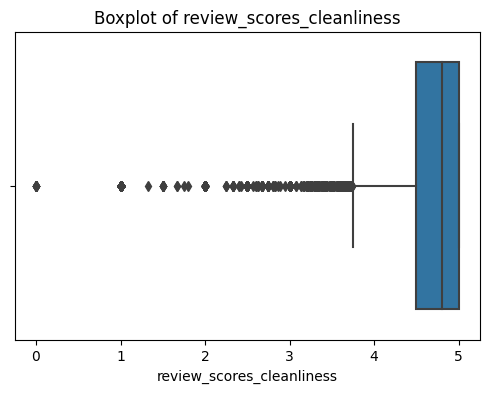

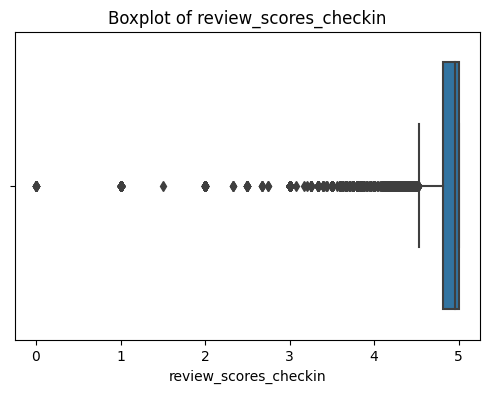

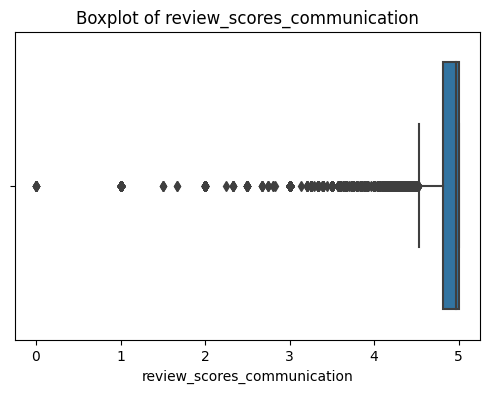

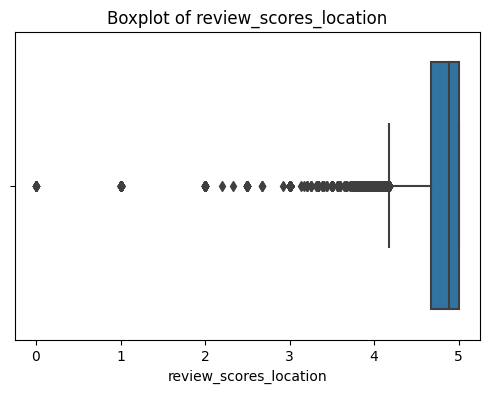

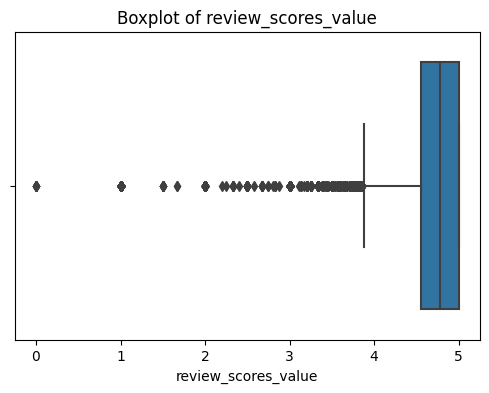

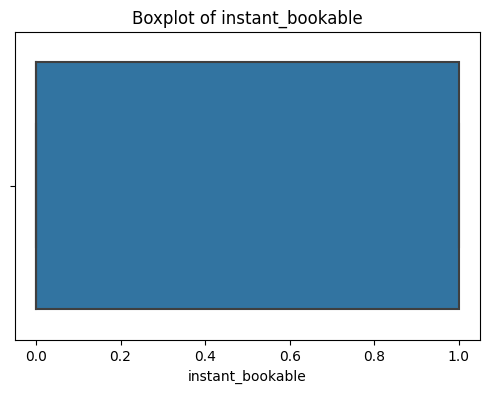

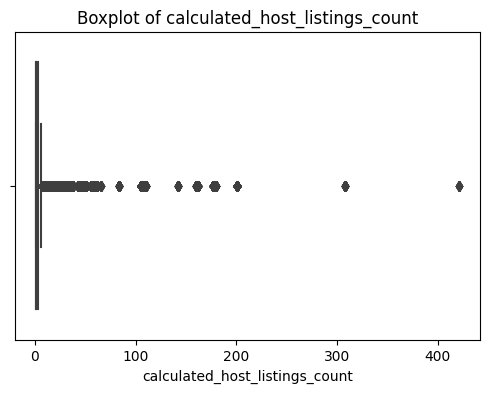

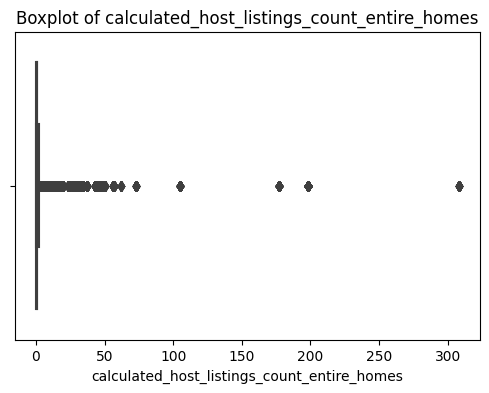

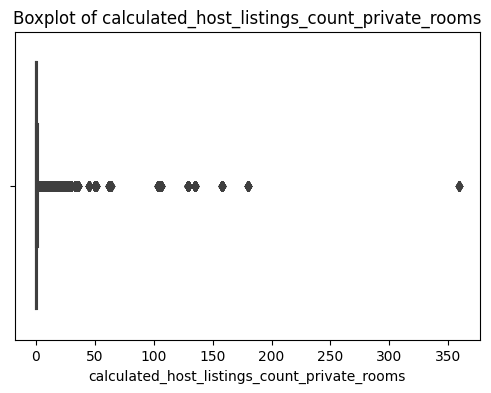

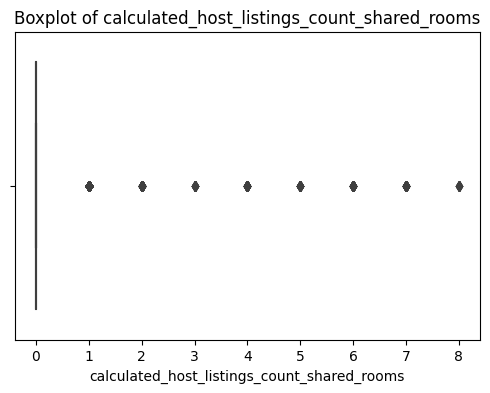

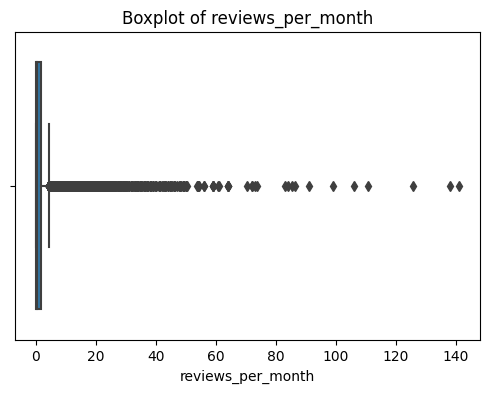

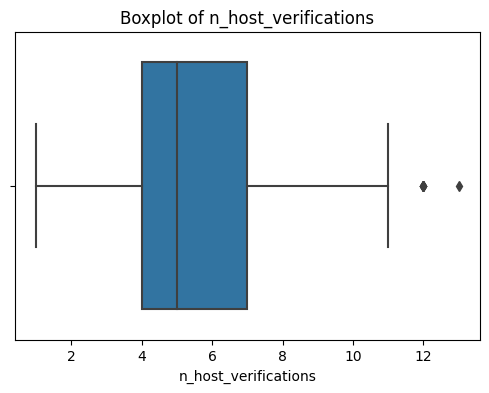

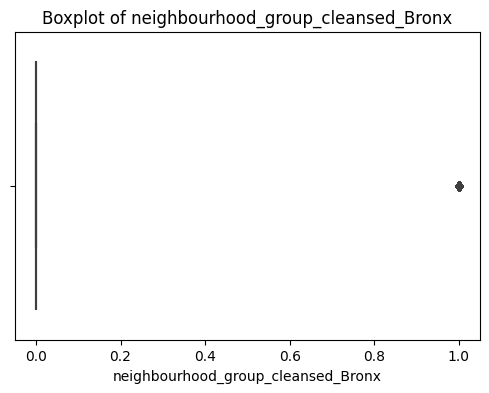

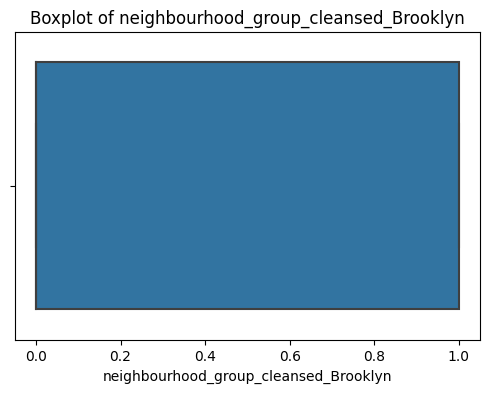

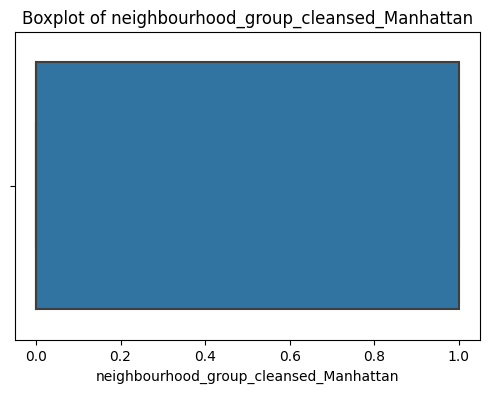

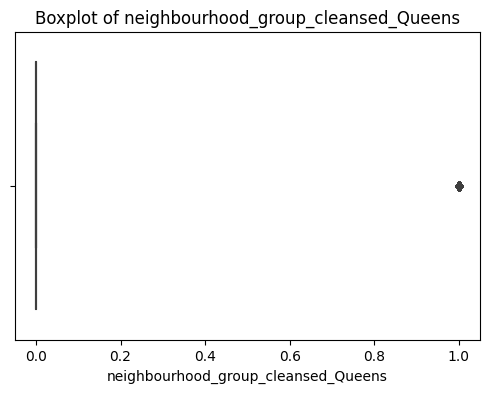

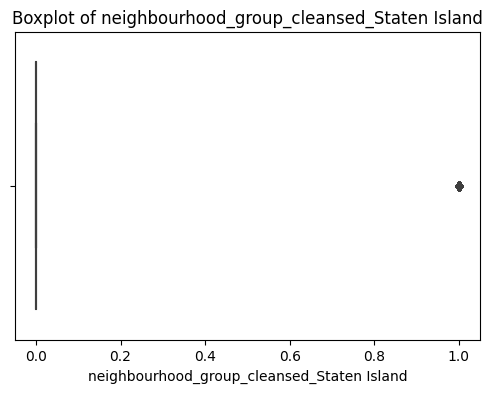

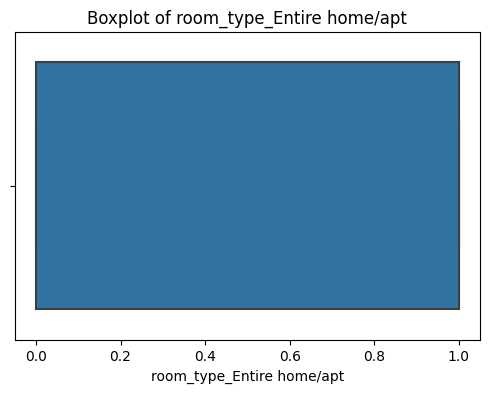

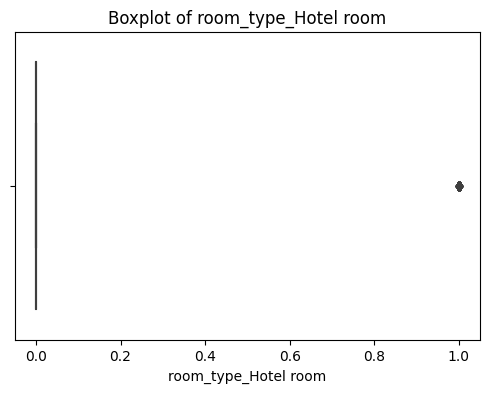

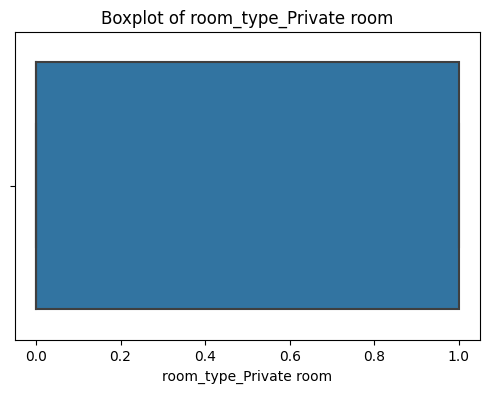

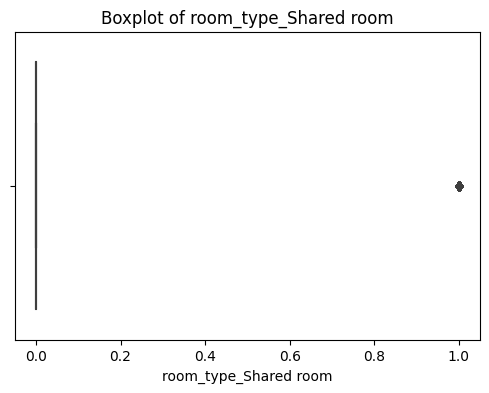

In [18]:

for feature in features:
    detect_outliers_visualization(feature)

### visualize the relationship between features and target labels

In [19]:
def numeric_feature_target_relationship(feature):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=feature, y='review_scores_rating', data=df)
    plt.title(f'{feature} vs Review Scores Rating')
    plt.show()


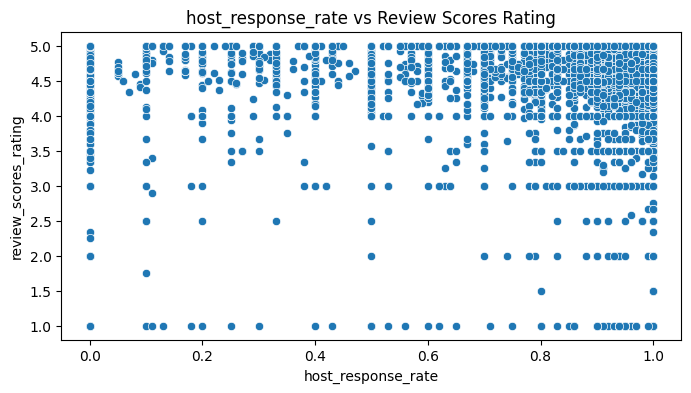

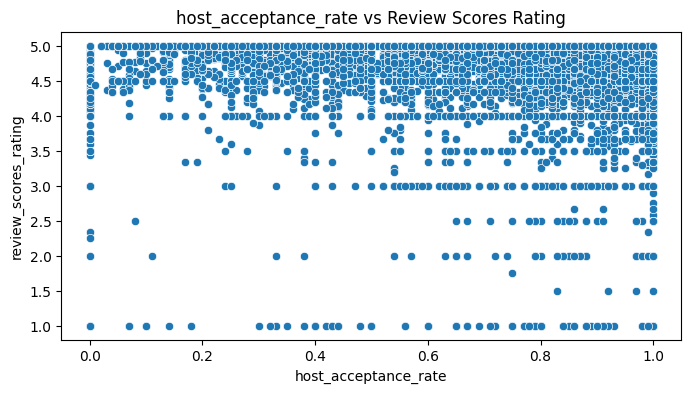

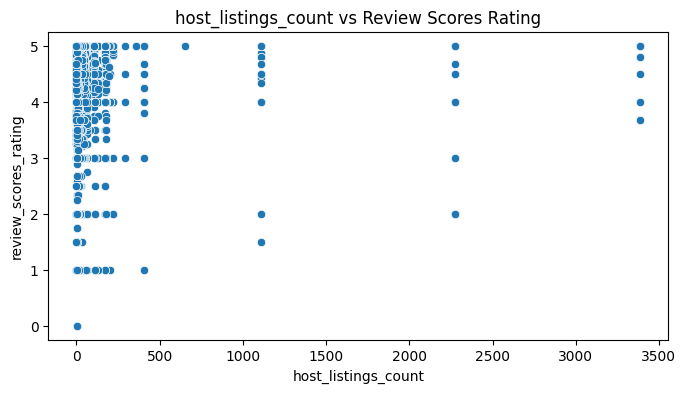

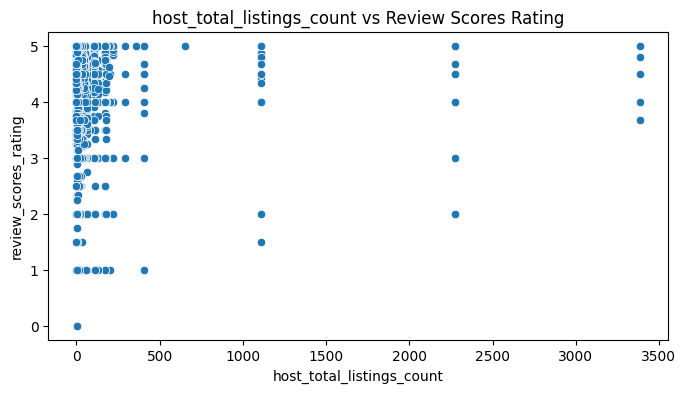

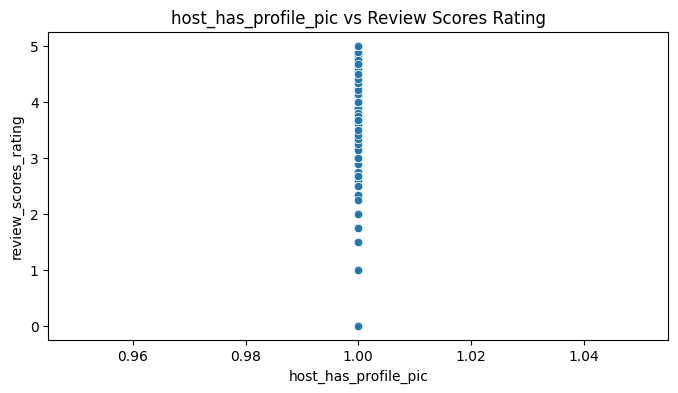

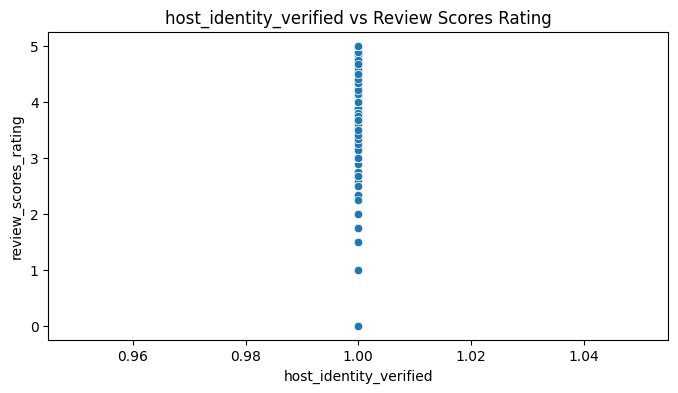

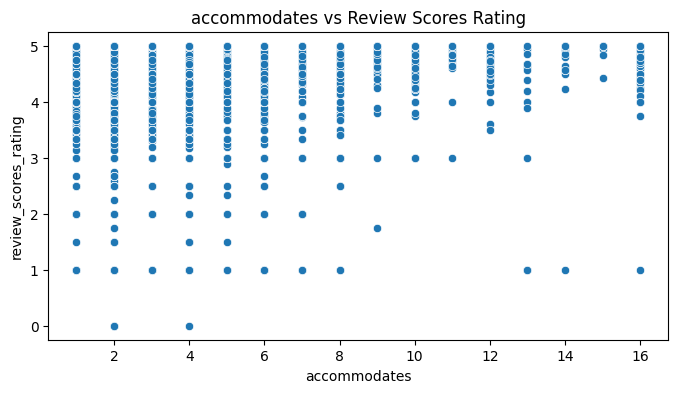

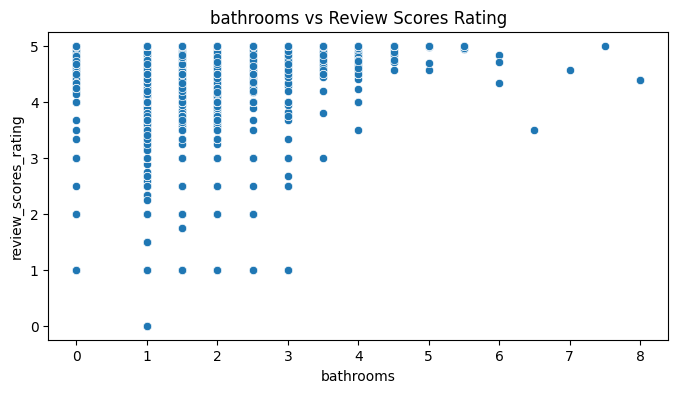

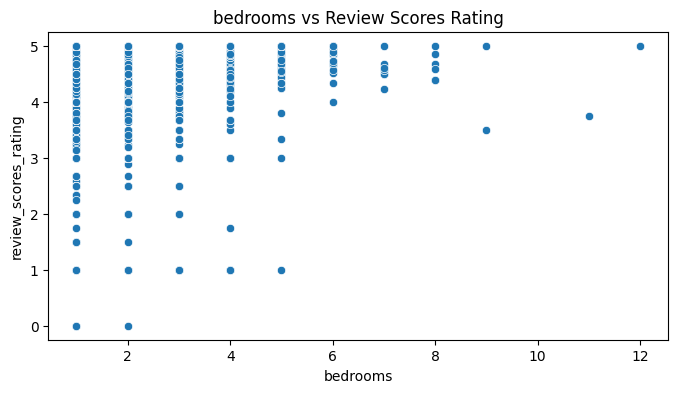

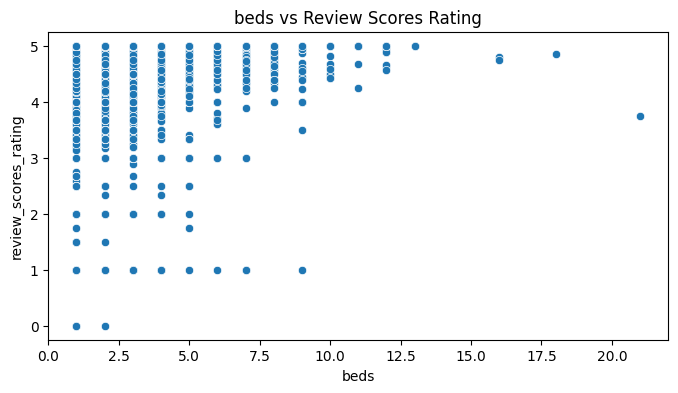

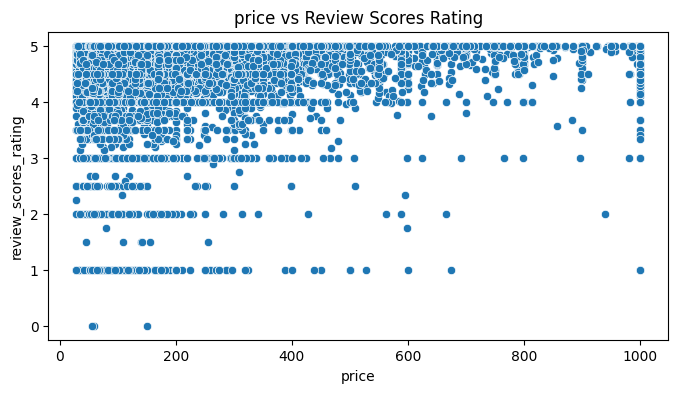

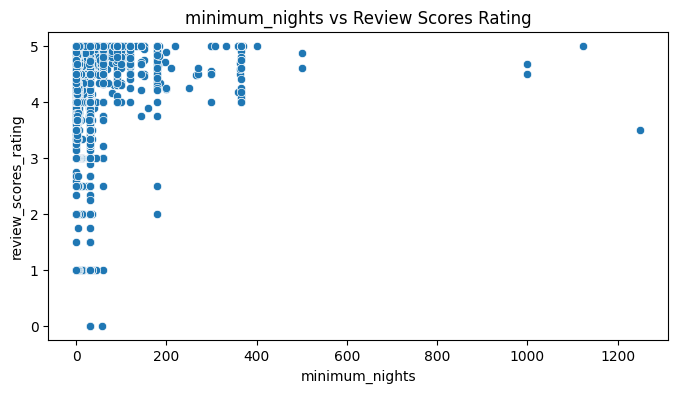

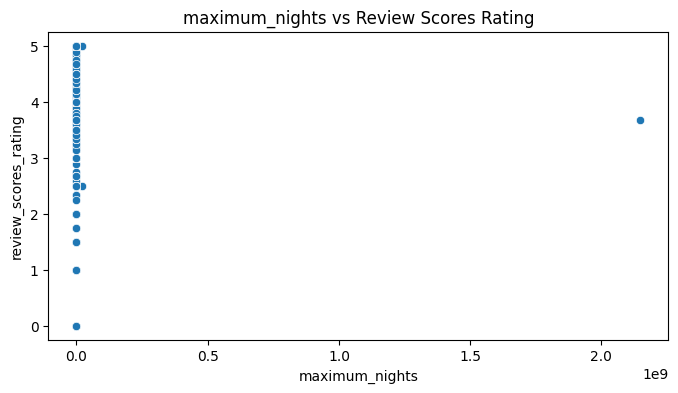

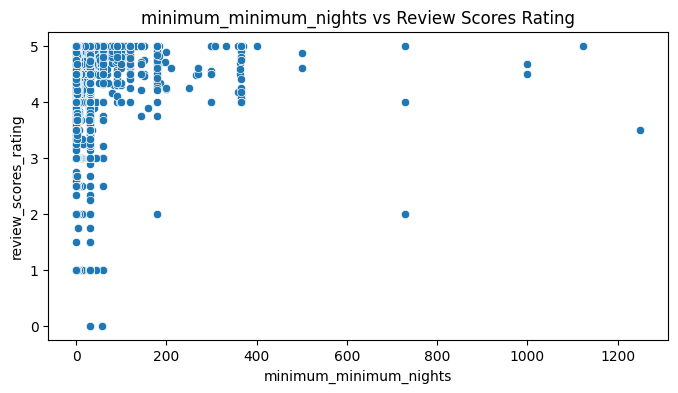

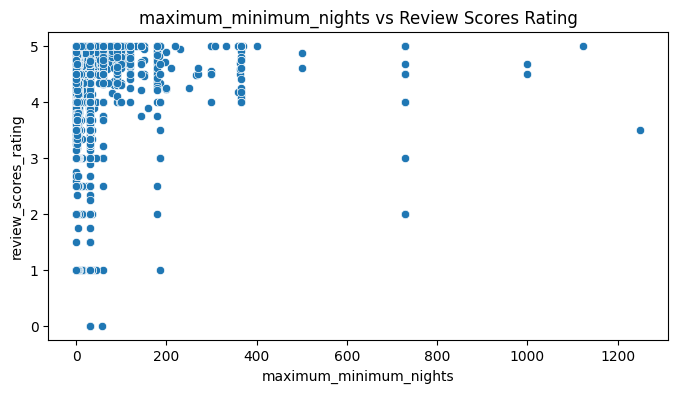

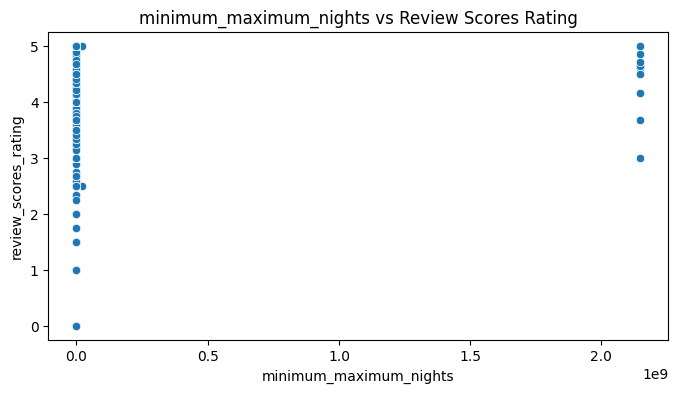

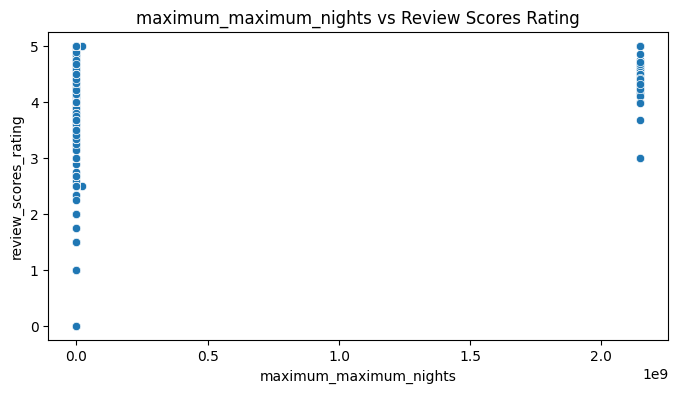

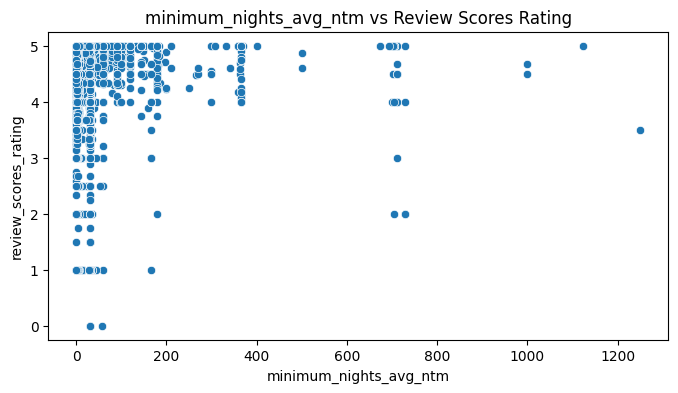

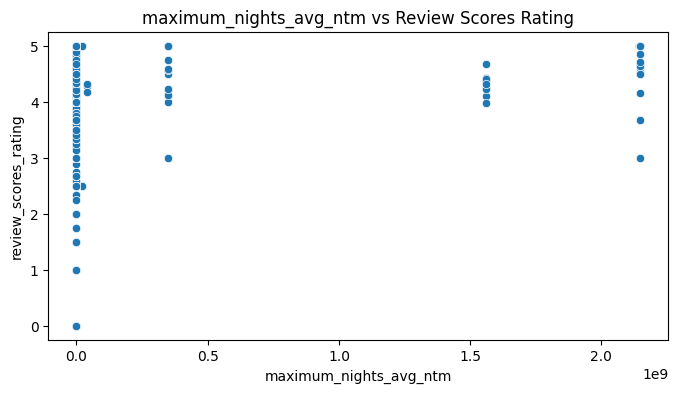

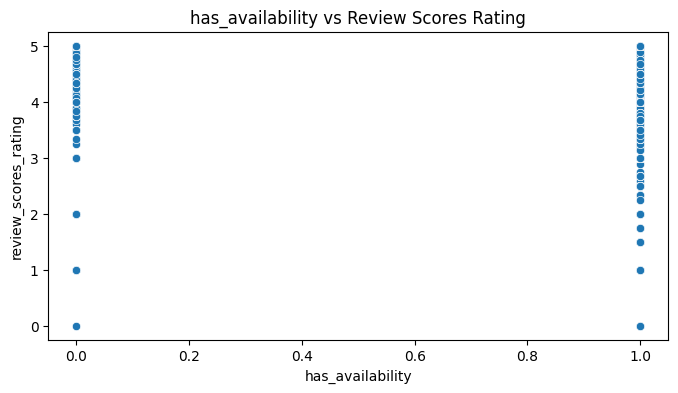

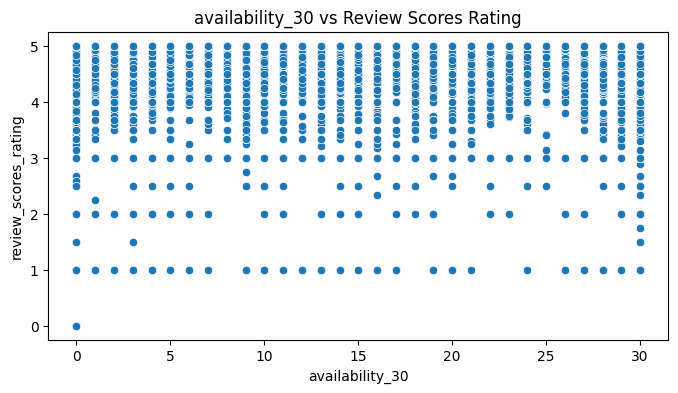

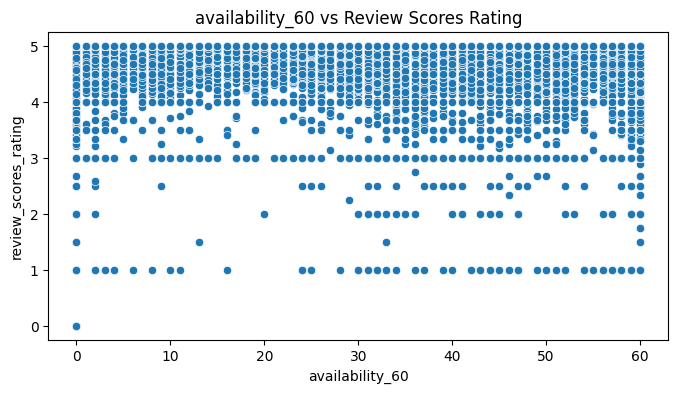

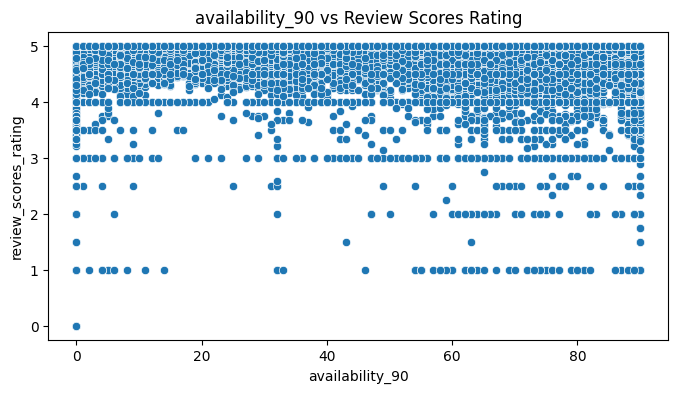

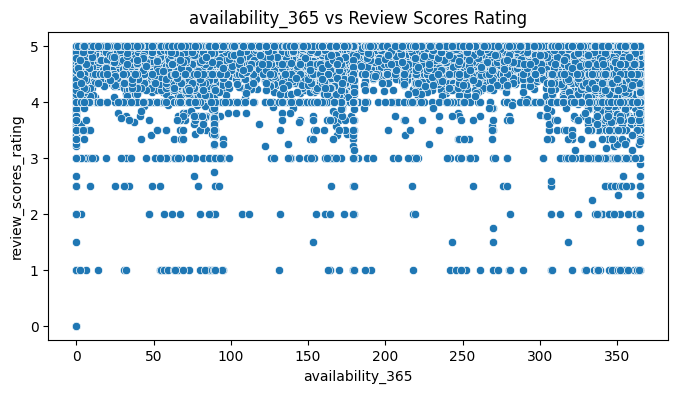

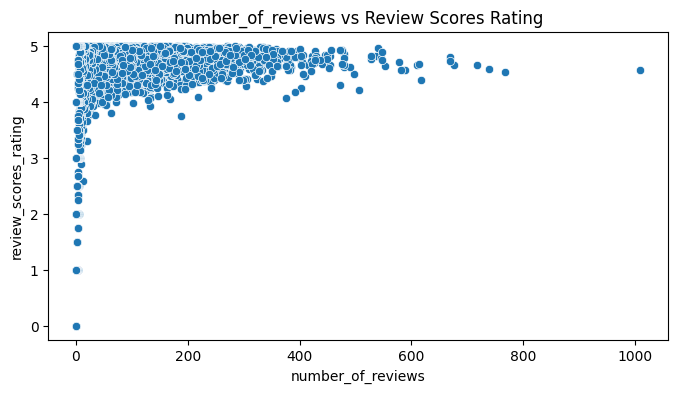

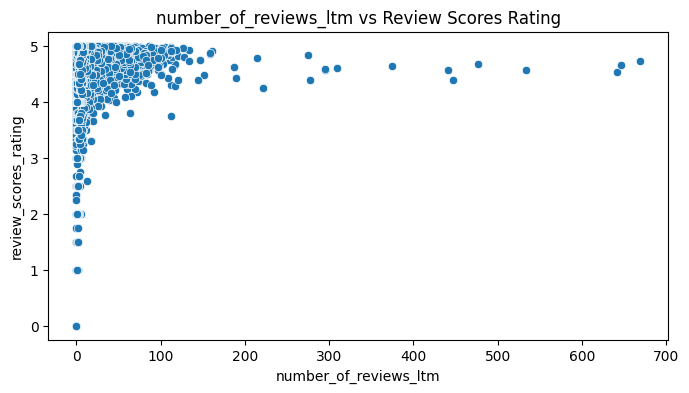

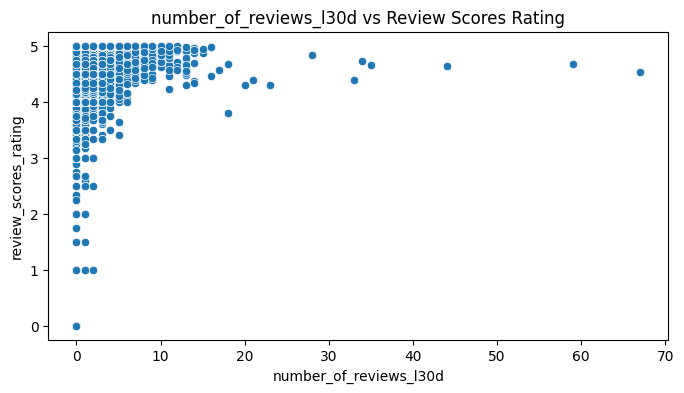

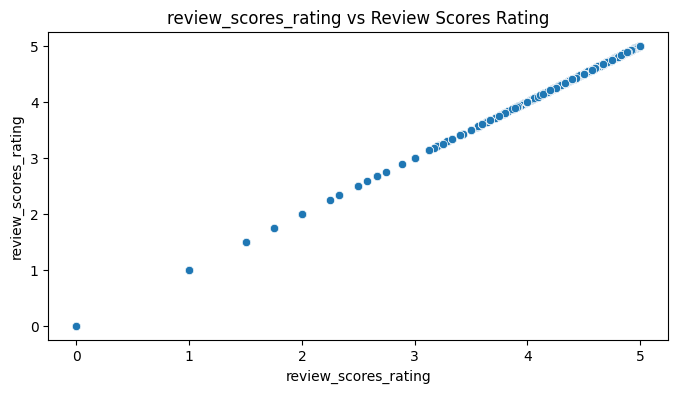

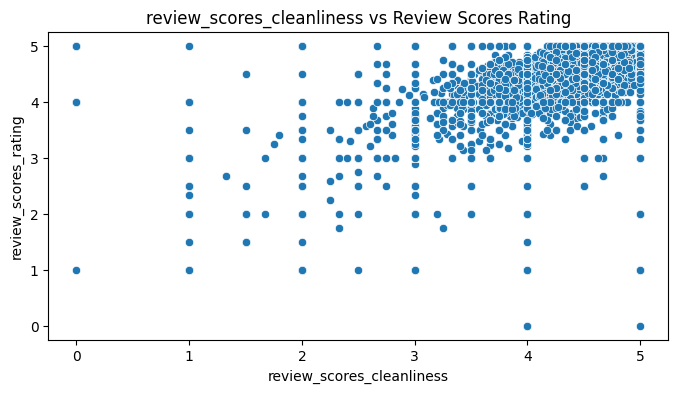

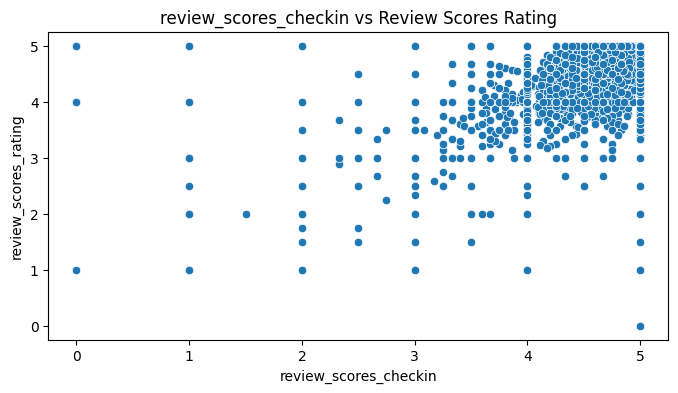

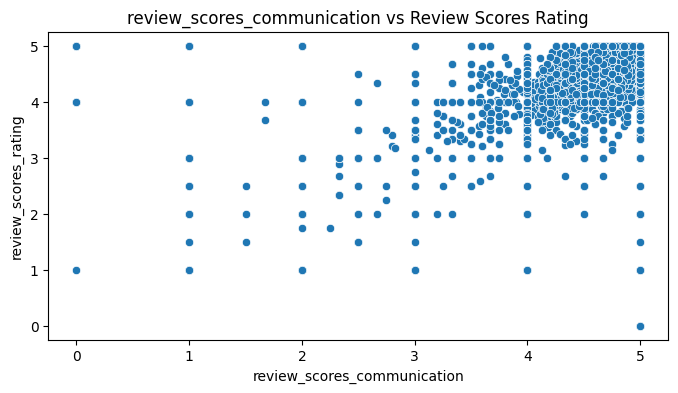

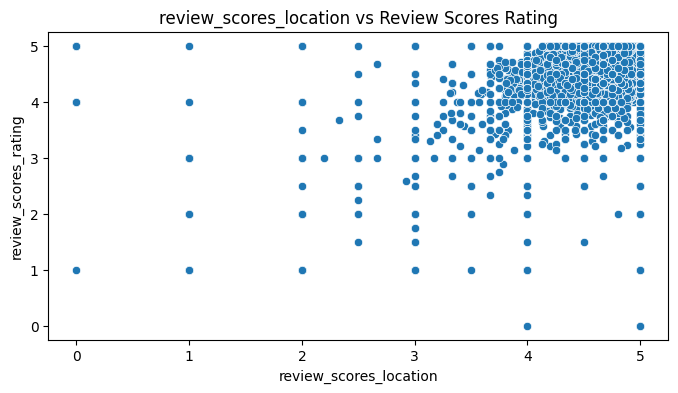

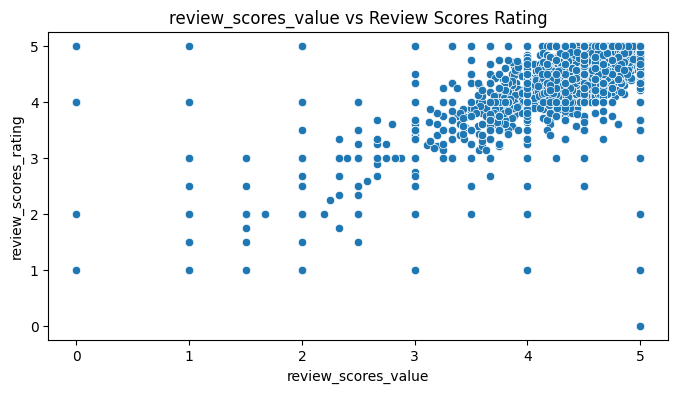

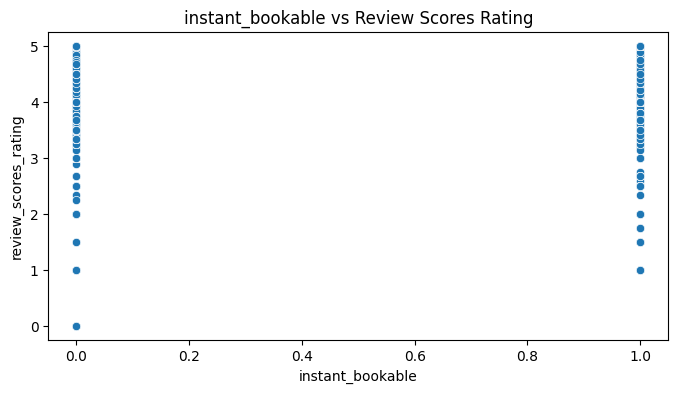

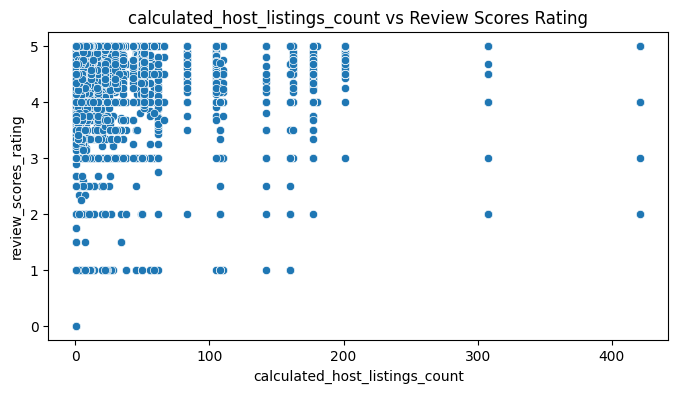

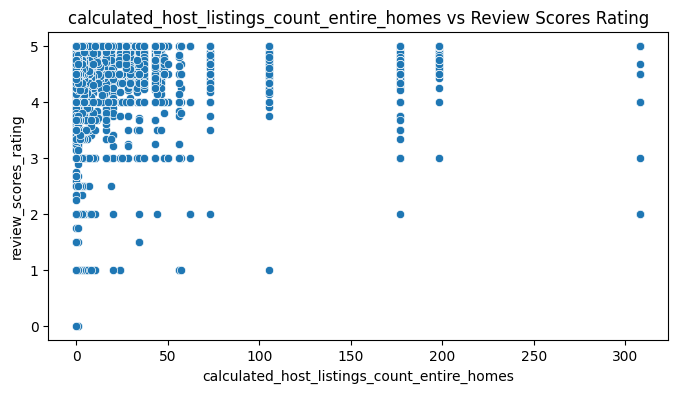

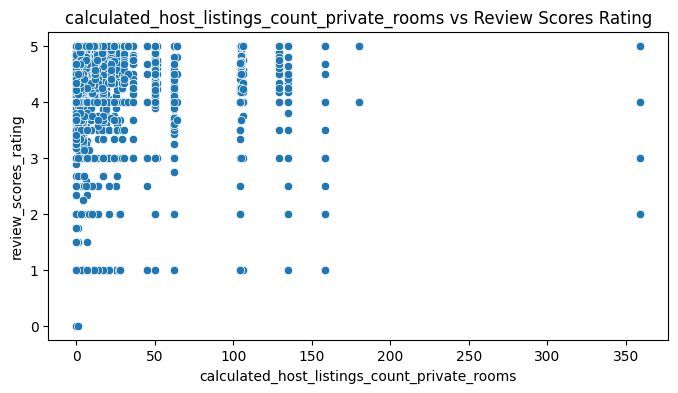

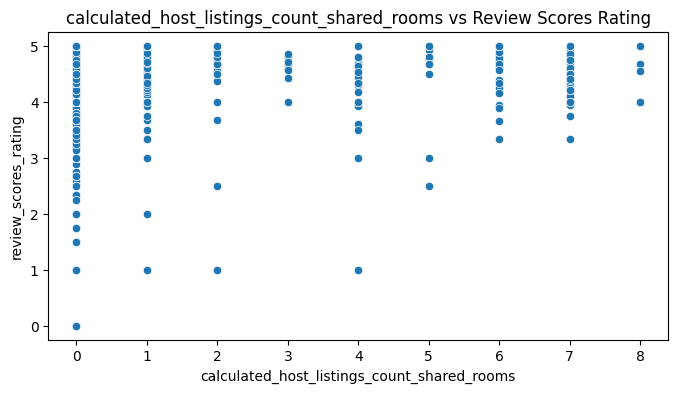

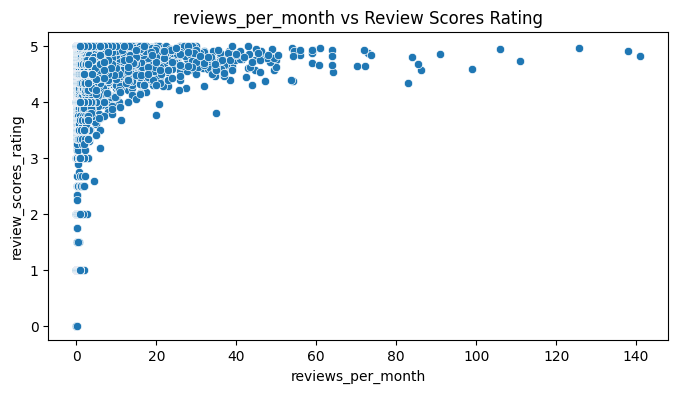

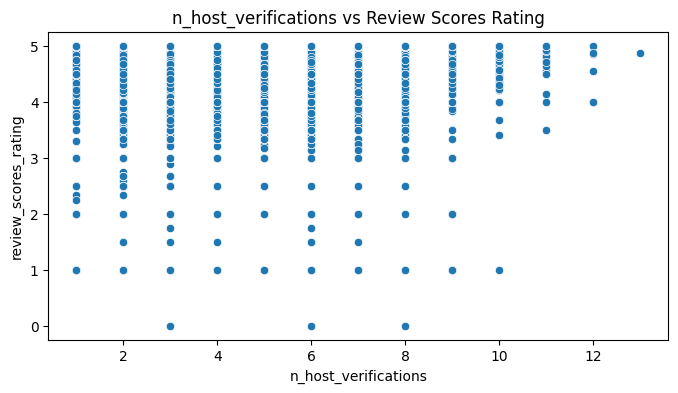

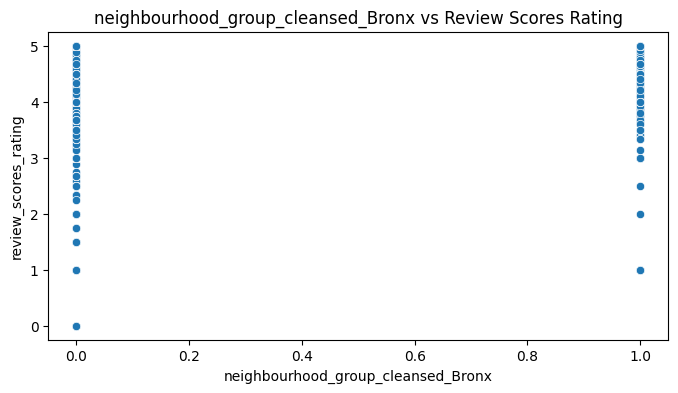

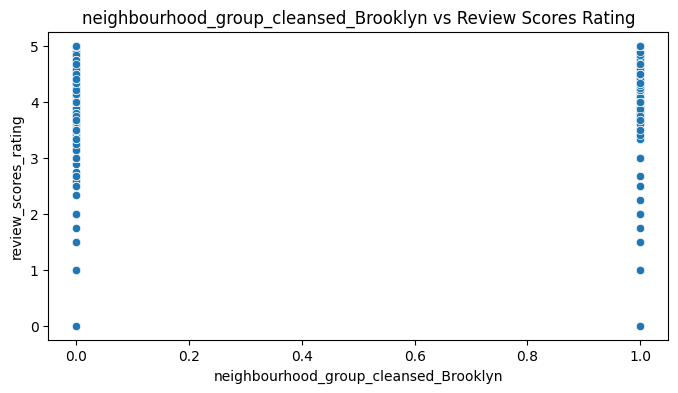

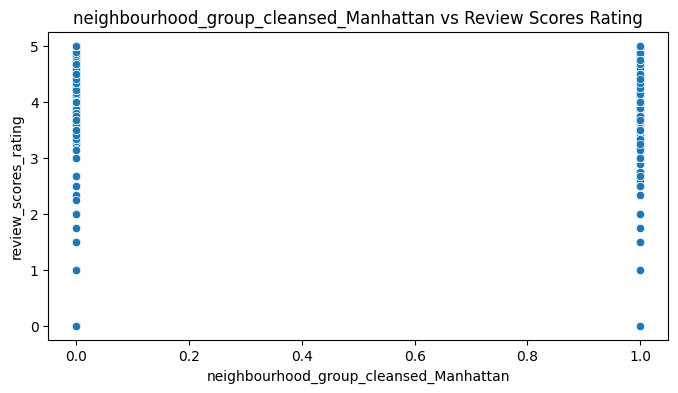

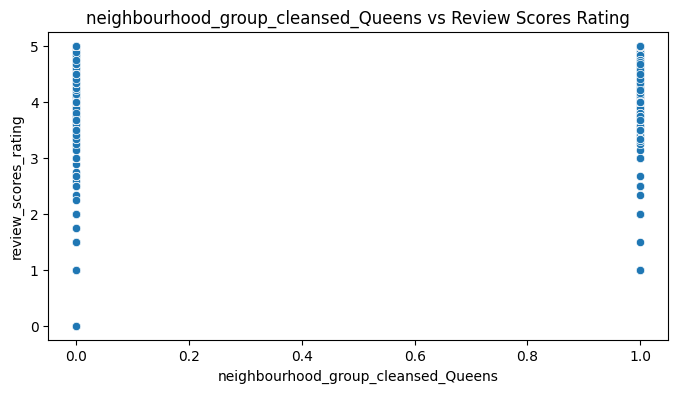

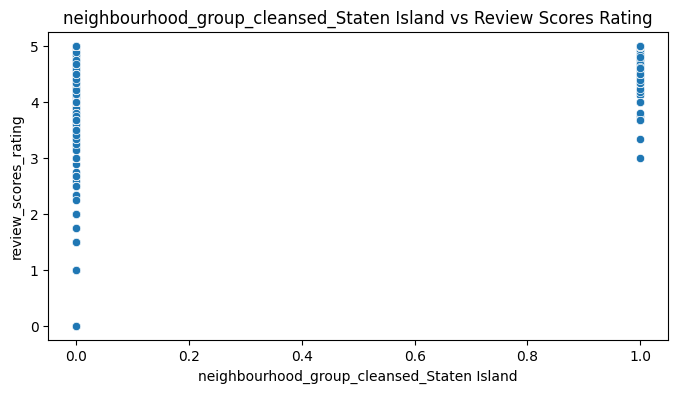

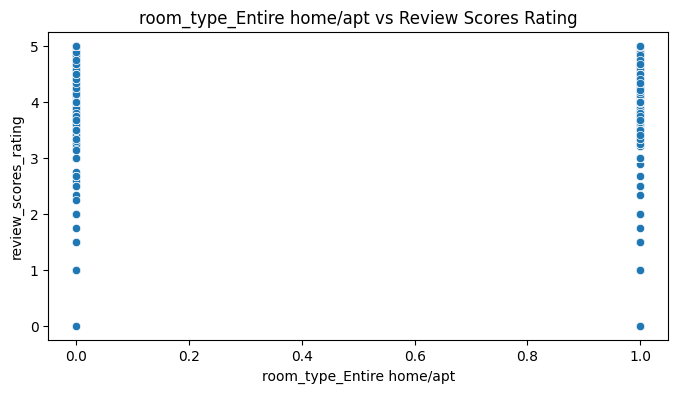

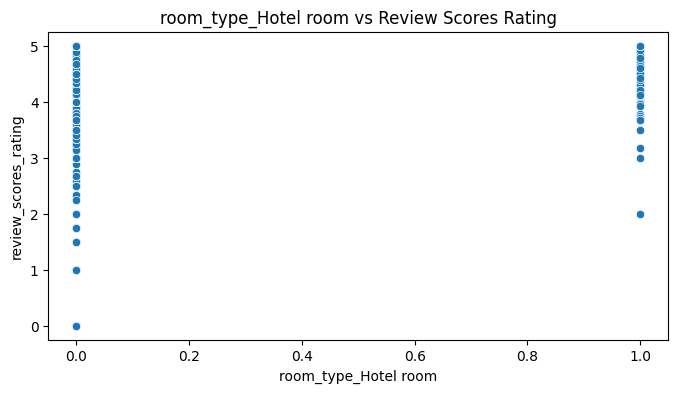

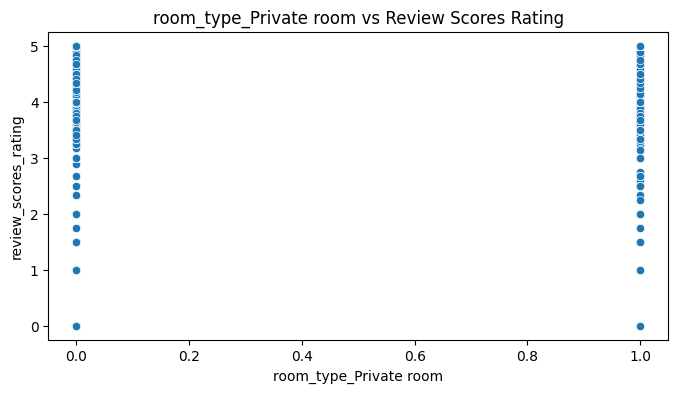

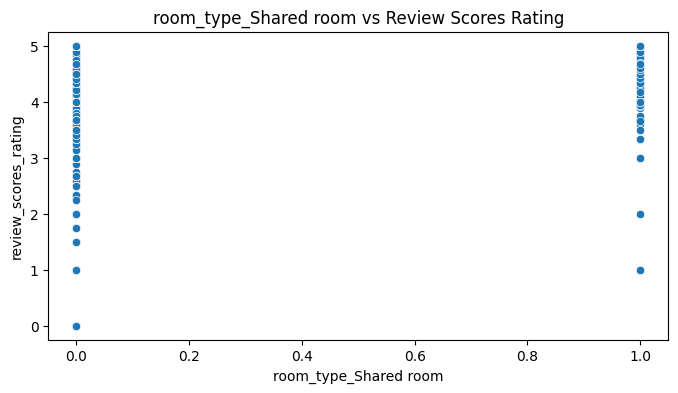

In [20]:
#features vs target labels visualization for numeric features
for feature in features:
    numeric_feature_target_relationship(feature)

### Visualize distributions of key numeric features


In [21]:
def numeric_feature_visualization(feature):
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

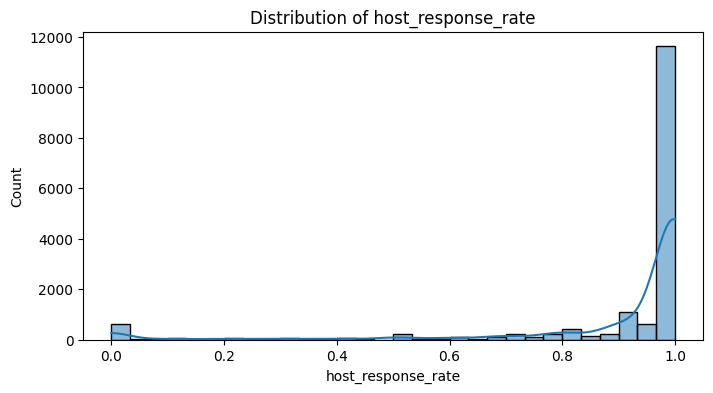

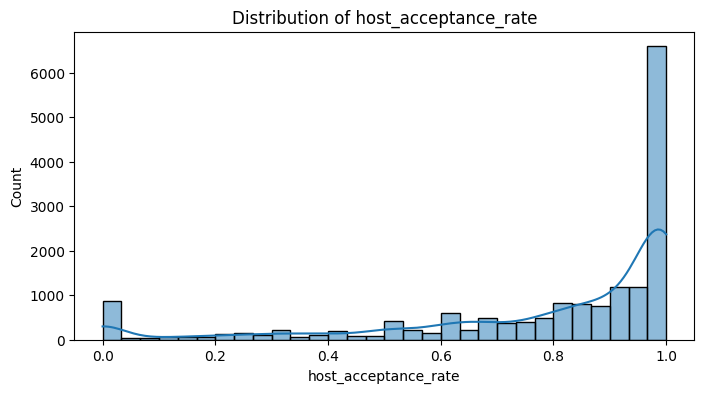

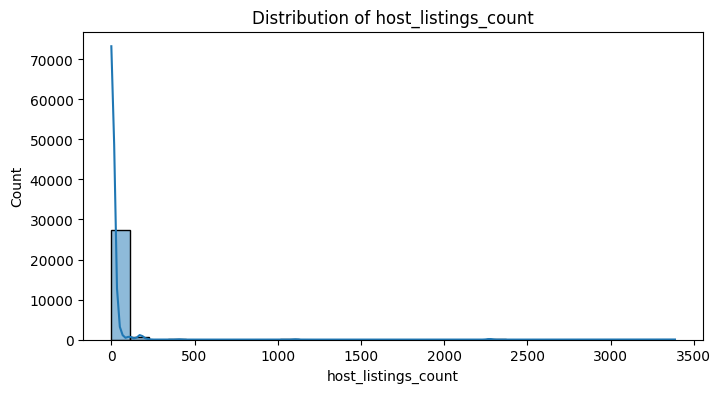

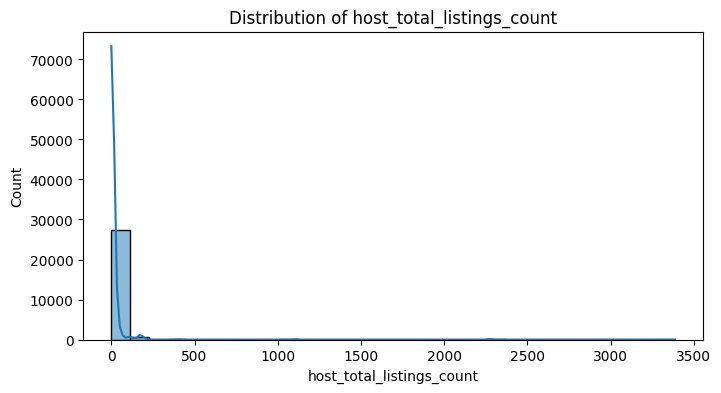

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


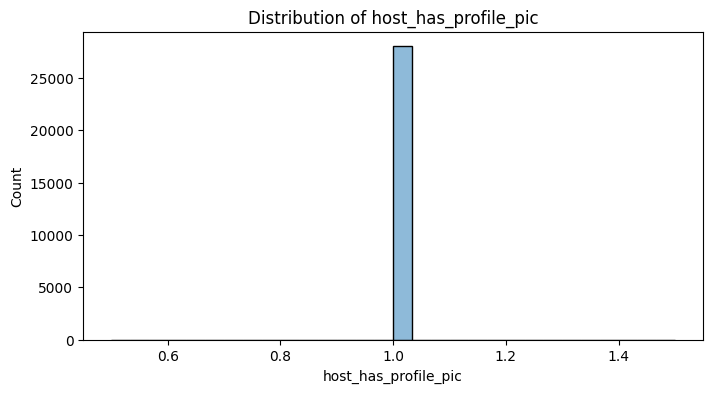

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


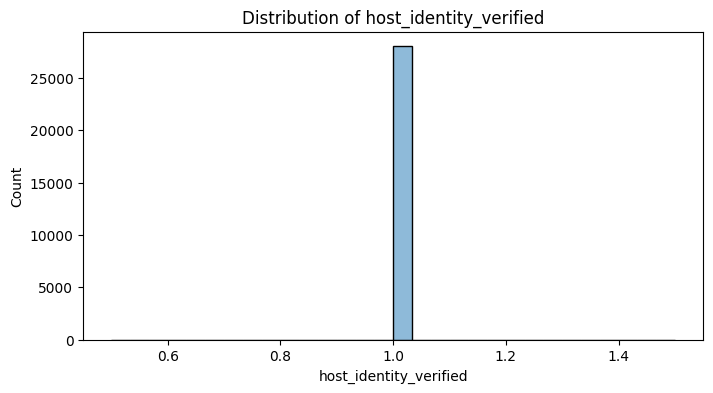

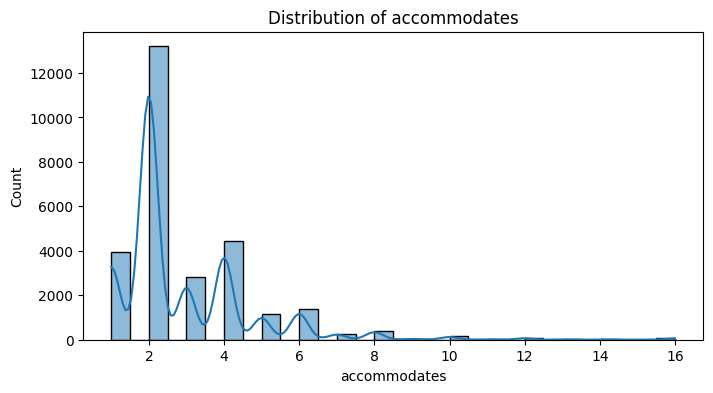

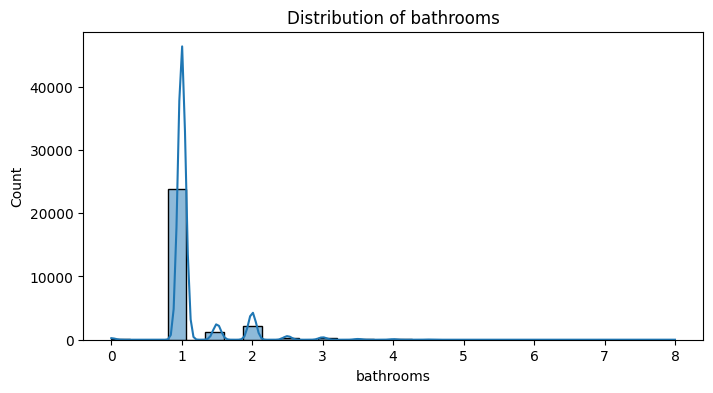

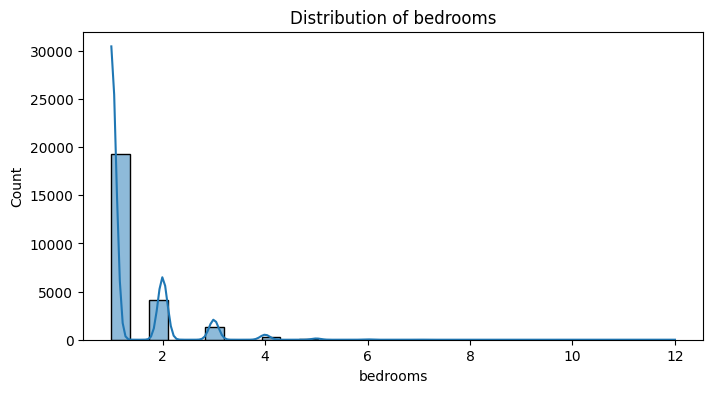

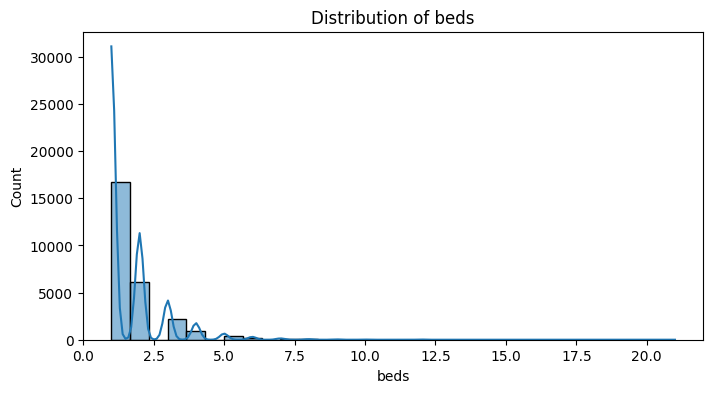

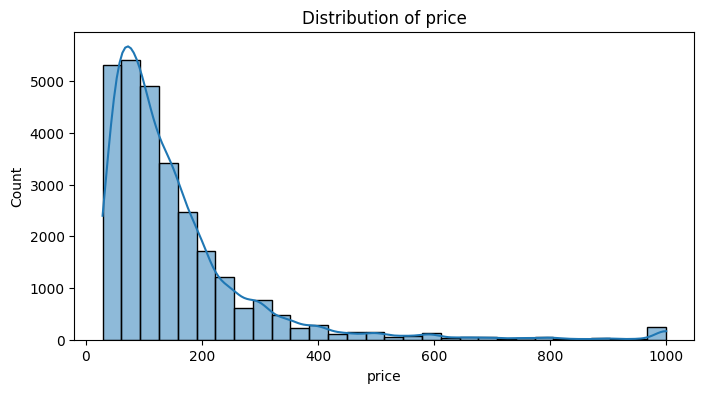

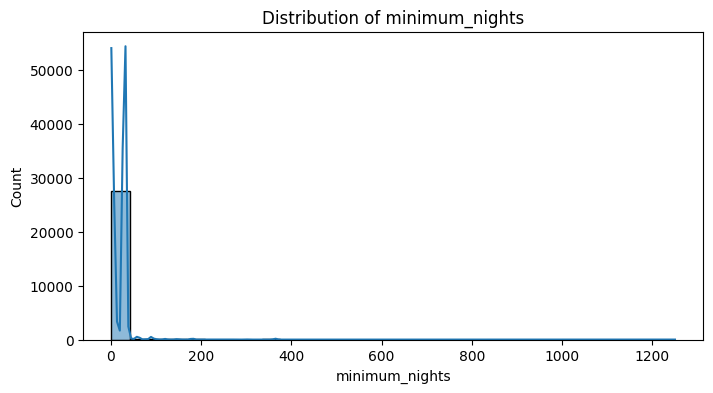

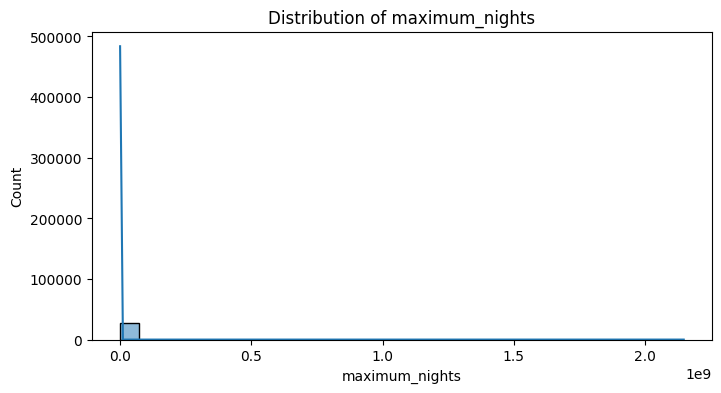

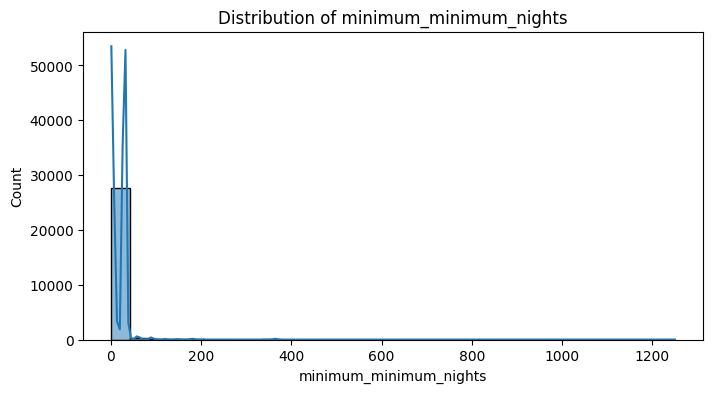

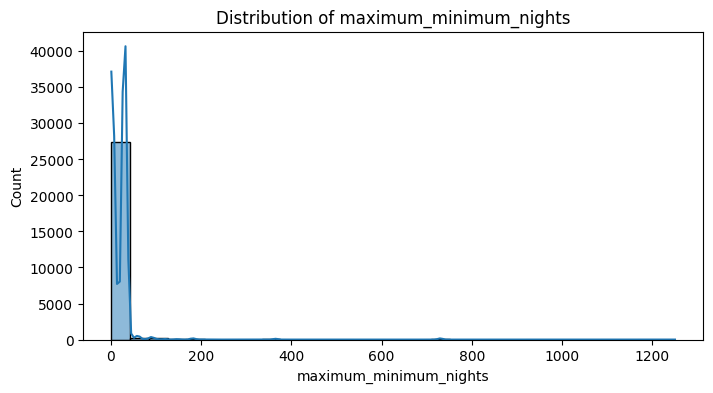

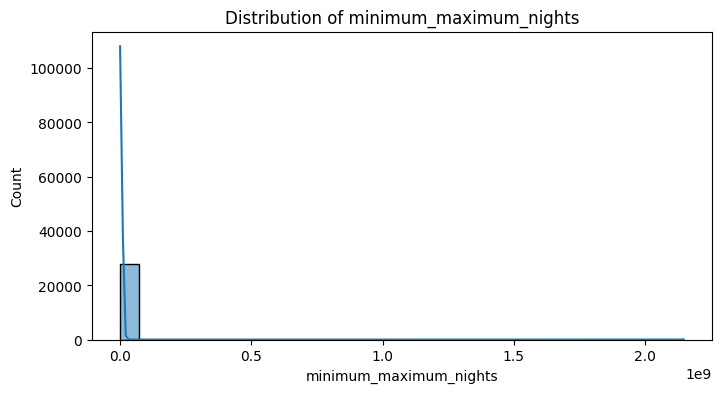

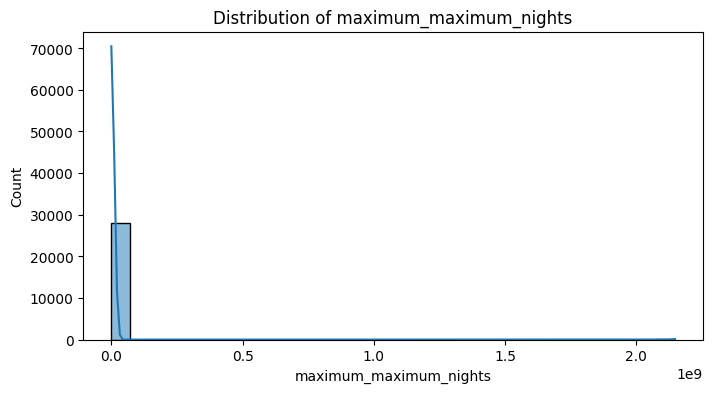

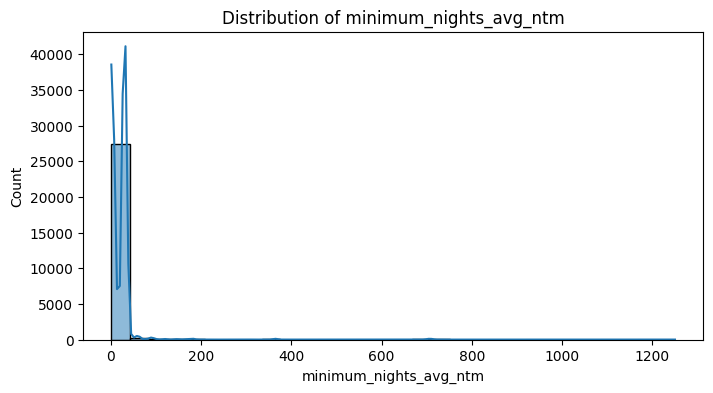

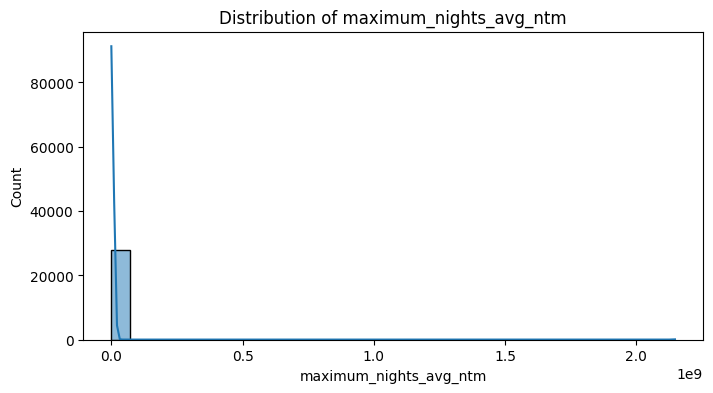

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


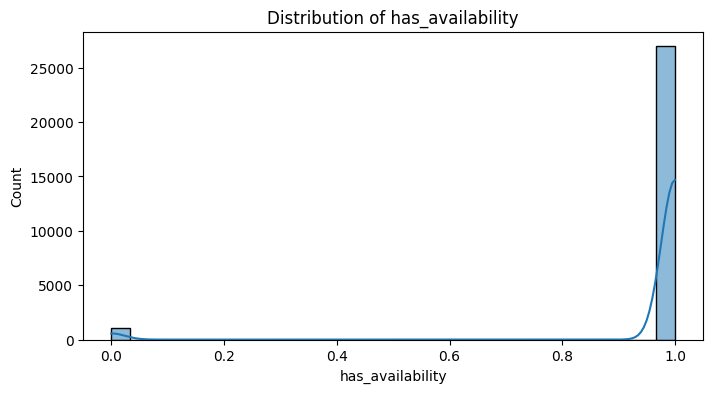

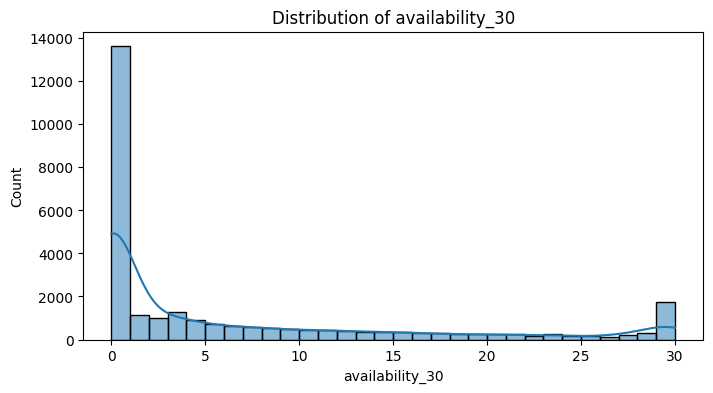

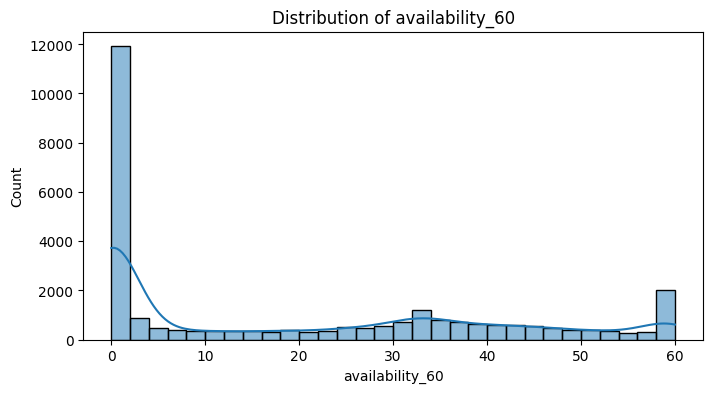

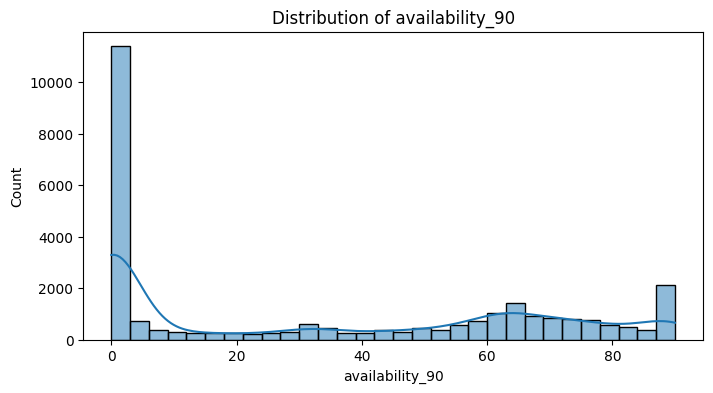

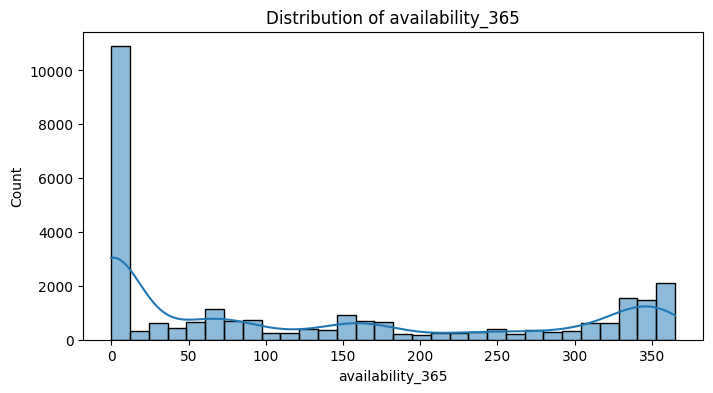

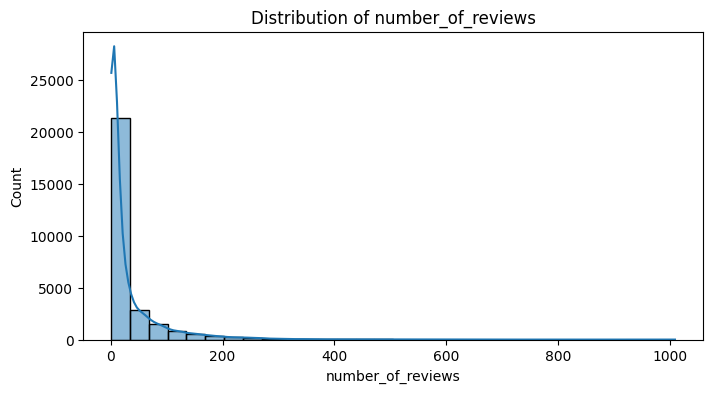

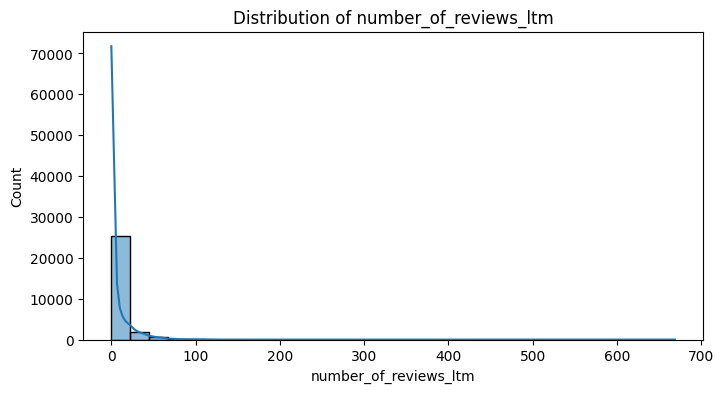

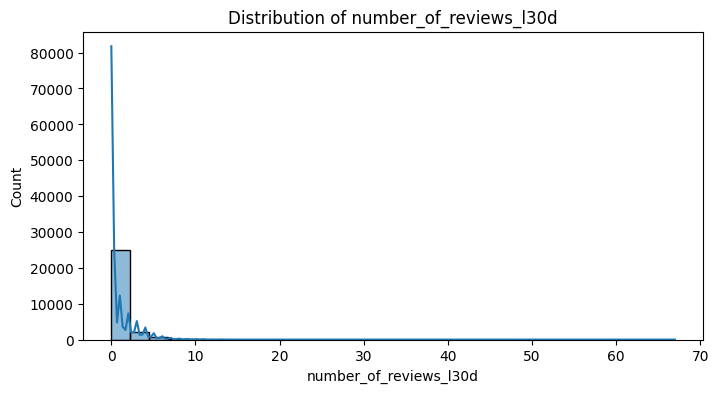

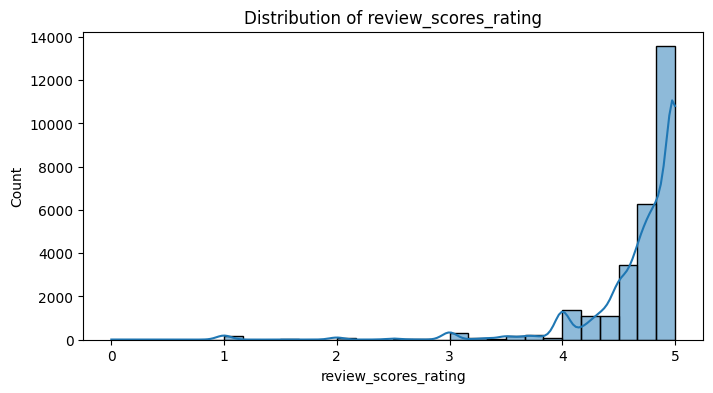

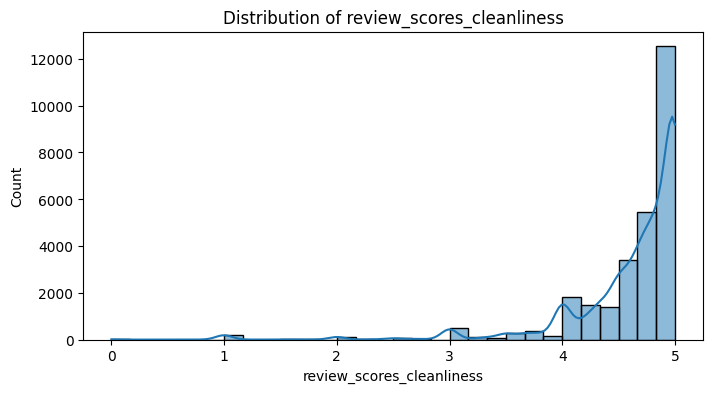

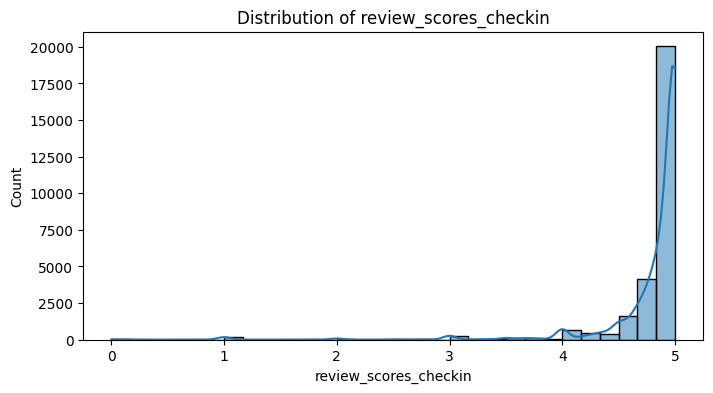

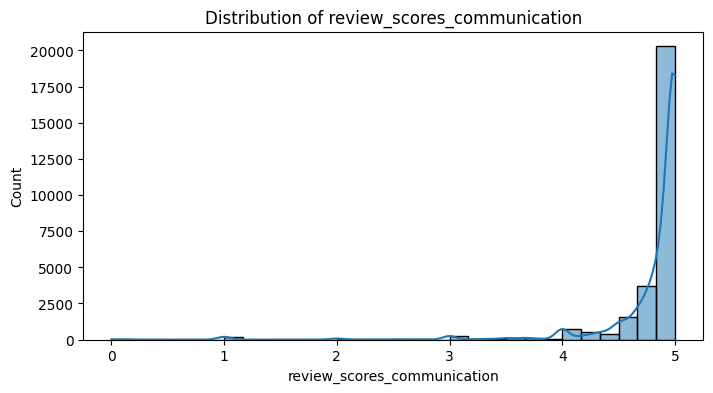

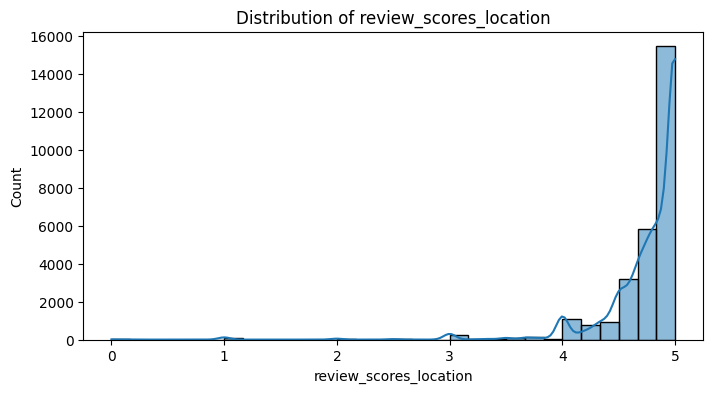

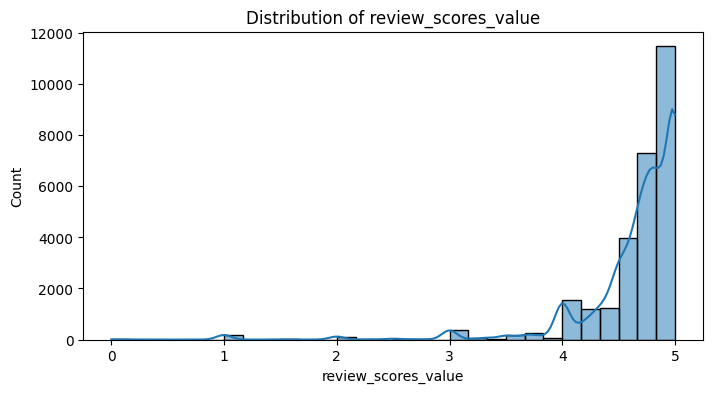

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


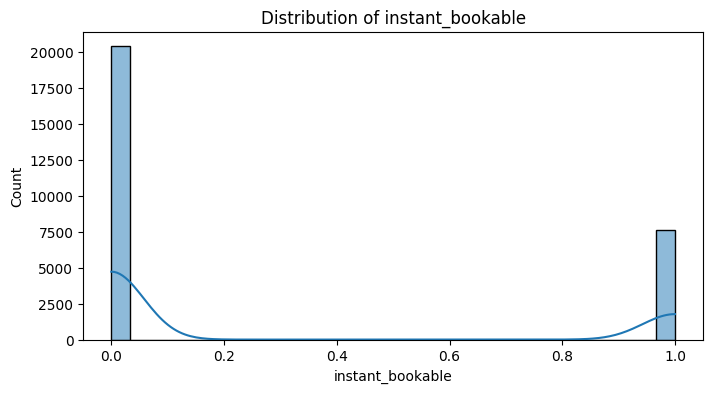

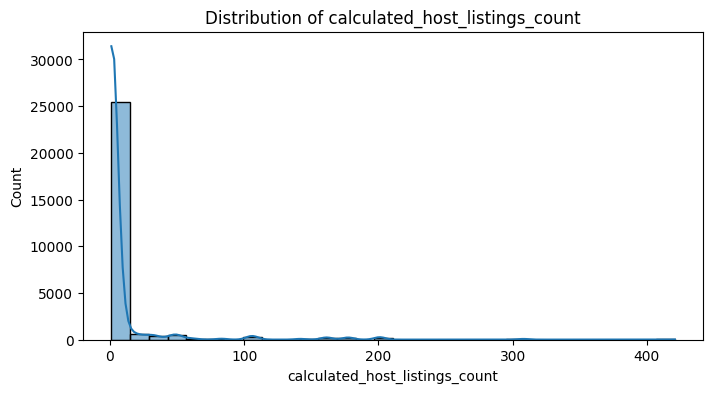

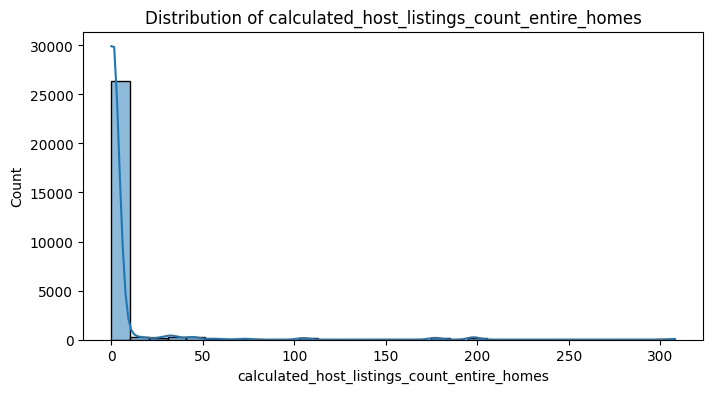

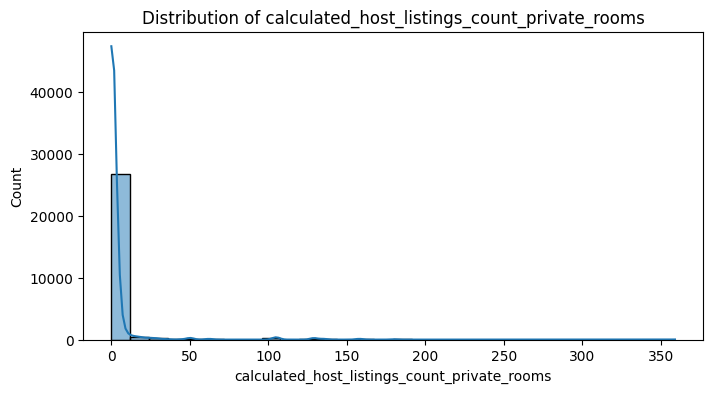

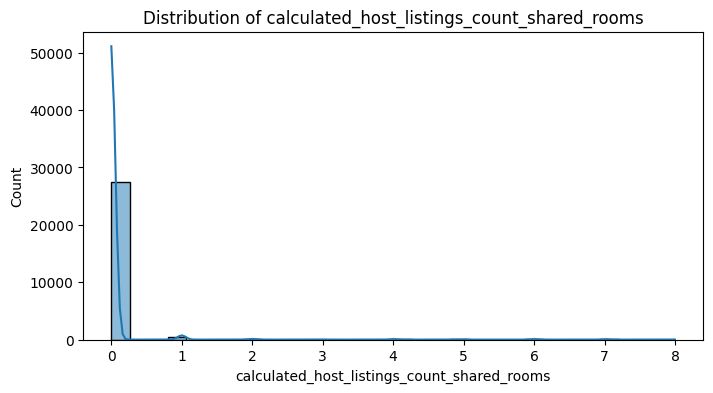

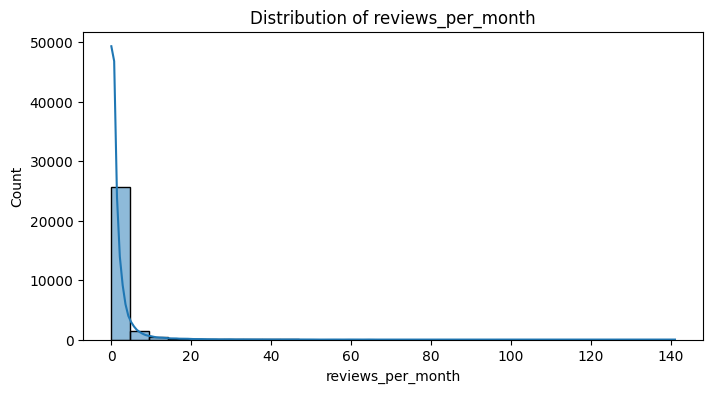

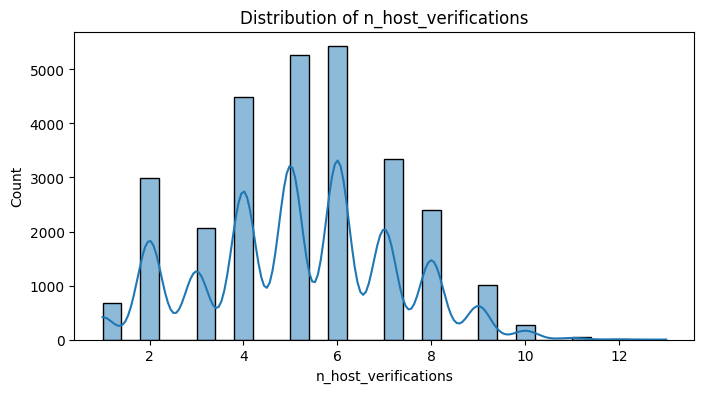

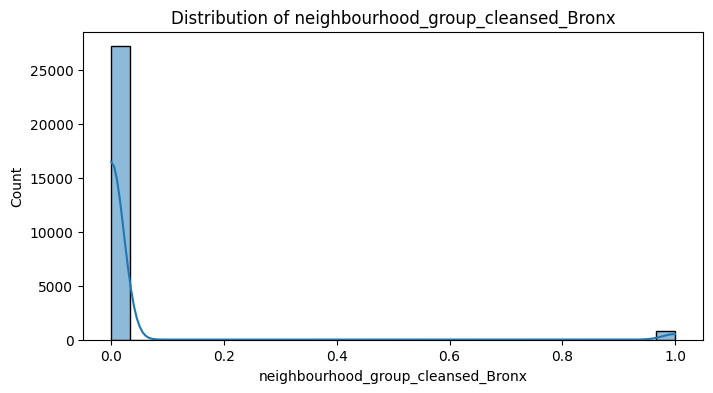

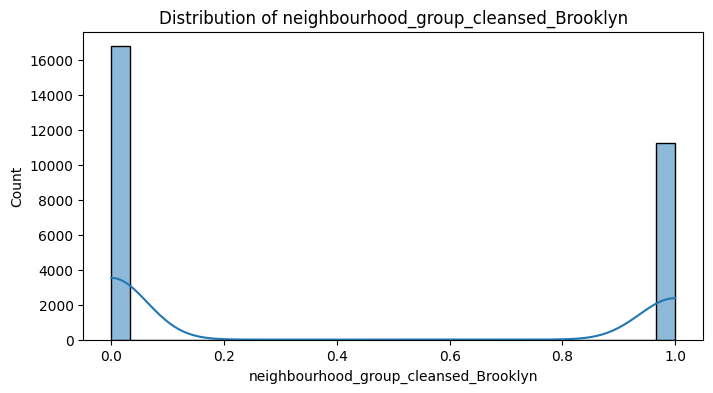

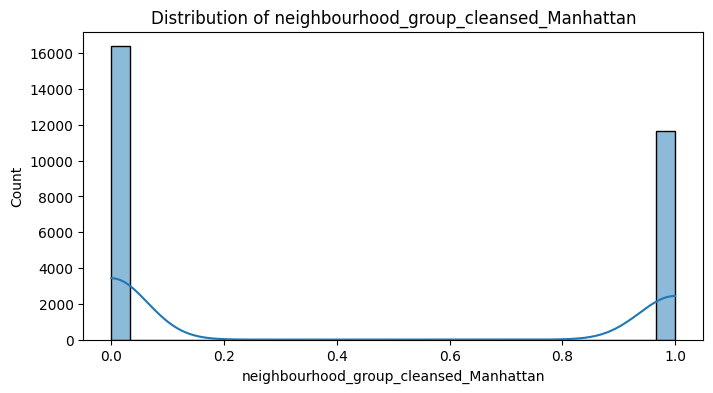

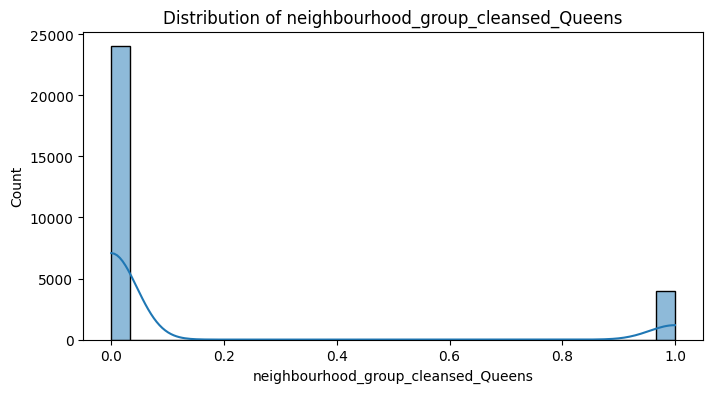

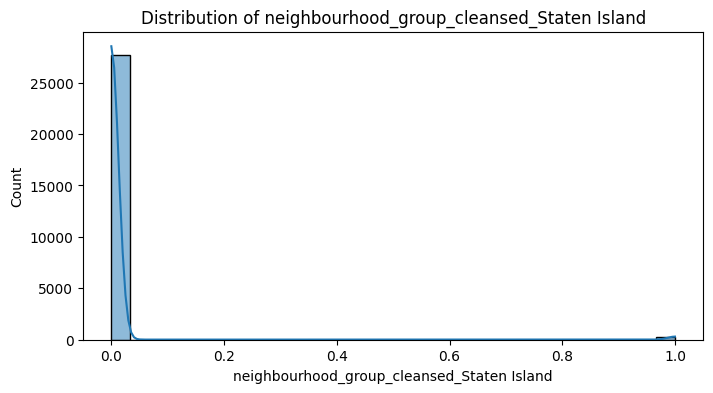

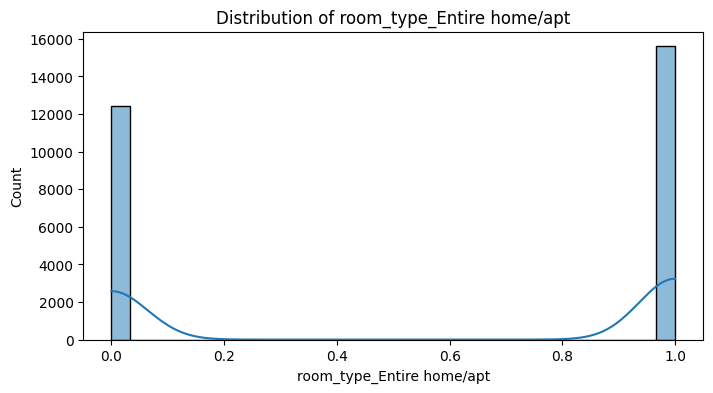

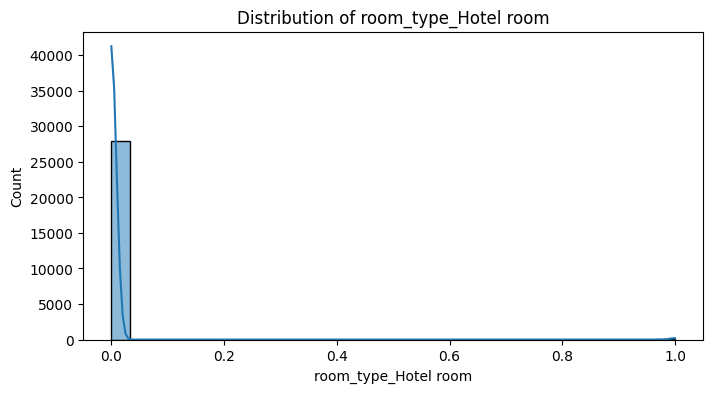

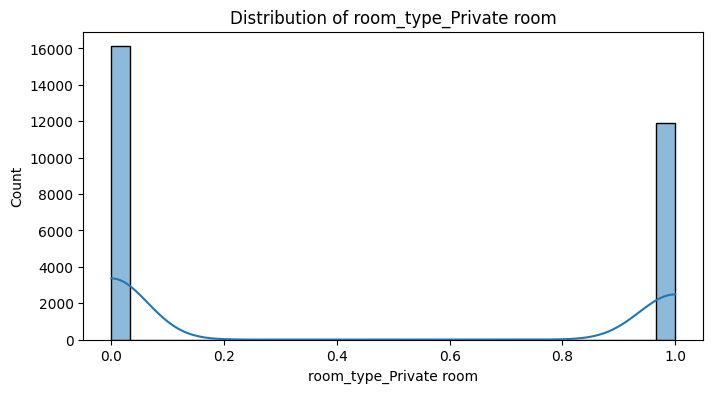

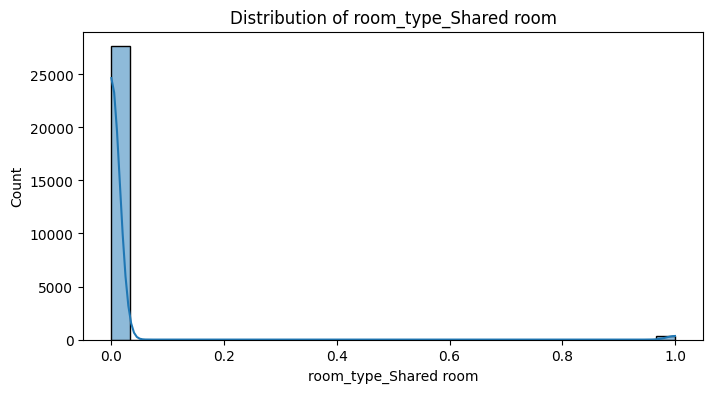

In [22]:

for feature in features:
    numeric_feature_visualization(feature)

Create correlations between feature

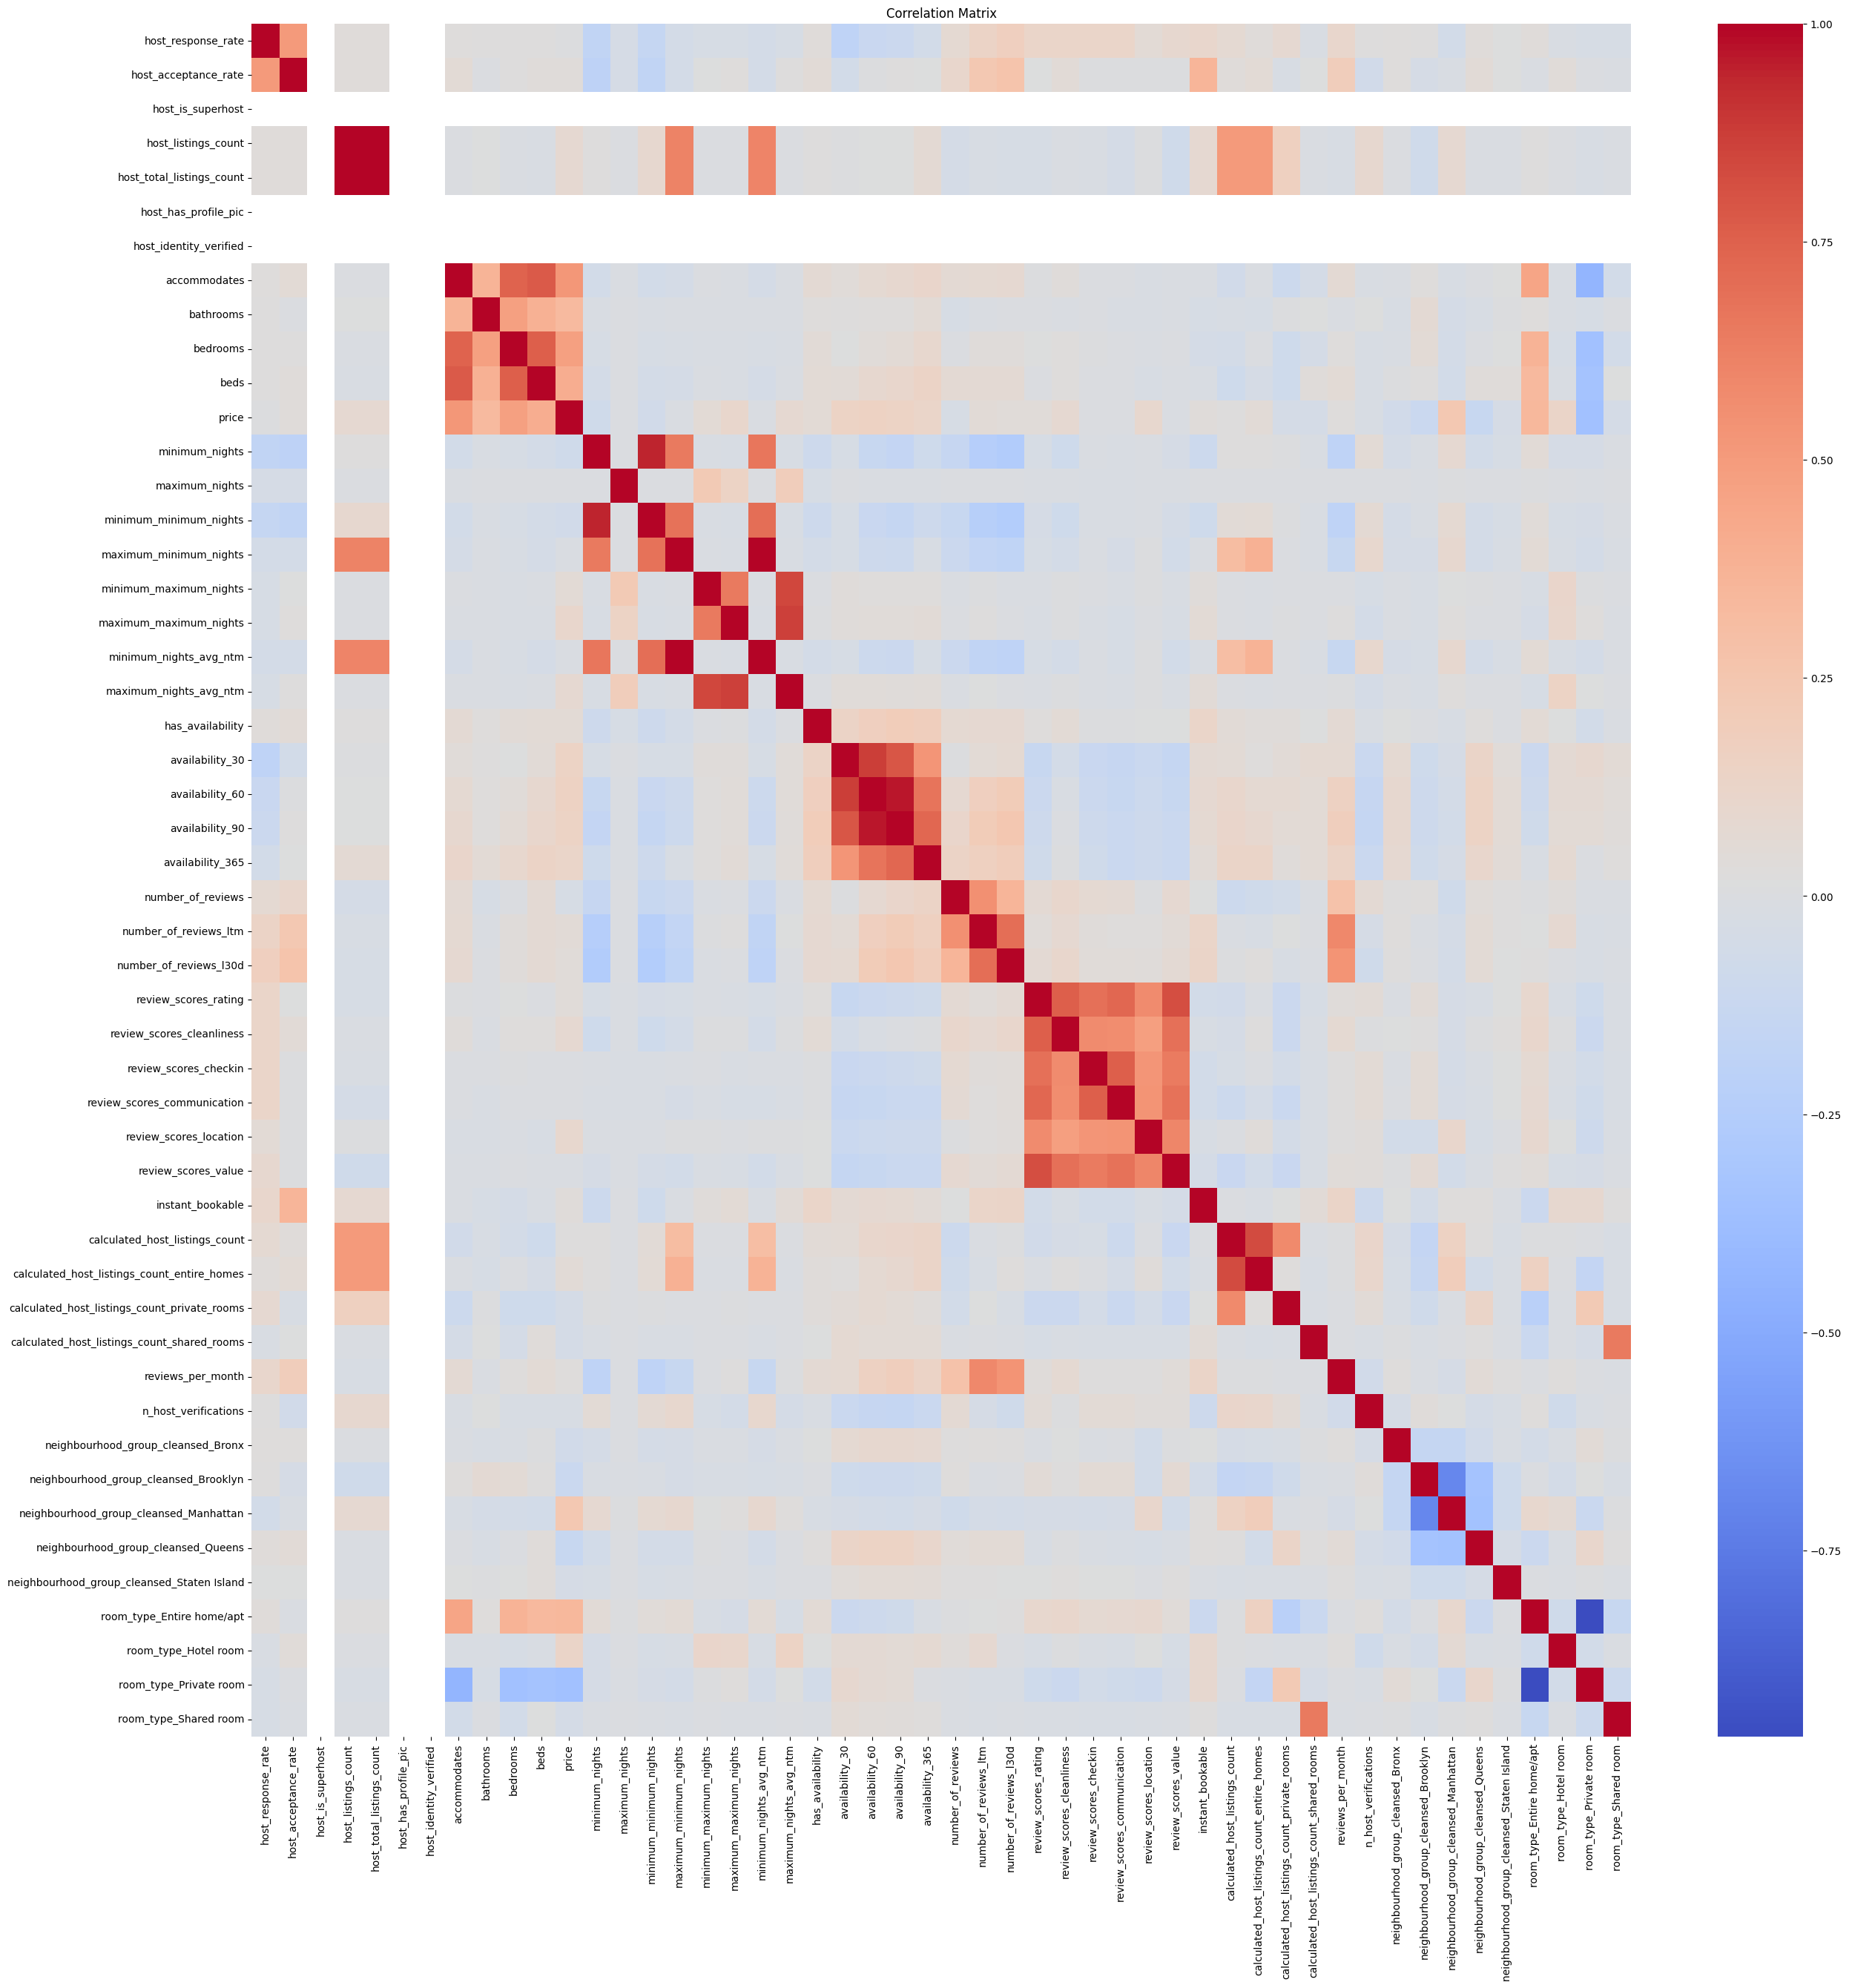

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=False, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Based on the correlation matrix, high positive correlations exist between reviews_score_ratings and the following features:
- review_scores_cleanliness

- review_scores_communication

- review_scores_location

- review_scores_checkin

- review_scores_value
### Low or No Correlation with review_scores_rating
- price

- accommodates

- bedrooms, bathrooms, beds

- Availability metrics (e.g., availability_30, availability_365)

- Some host metrics like host_listings_count, n_host_verifications
This means these features don't have a strong linear relationship with the review score.

### High Inter-Feature Correlation
- bedrooms, bathrooms, accommodates, and beds are tightly linked.

- Availability metrics across timeframes are also highly correlated.


### Display the correlation between features and the target label (reviews_score_ratings)

In [24]:
# Compute correlation matrix
corr_matrix = df.corr()

# Get correlation of all features with the target
target_corr = corr_matrix['review_scores_rating'].drop('review_scores_rating').sort_values(ascending=False)

# Show top correlated features
print(target_corr.head(10))

review_scores_value                      0.820631
review_scores_cleanliness                0.758213
review_scores_communication              0.727749
review_scores_checkin                    0.688152
review_scores_location                   0.574464
host_response_rate                       0.121477
room_type_Entire home/apt                0.096000
number_of_reviews_l30d                   0.067435
number_of_reviews                        0.067182
neighbourhood_group_cleansed_Brooklyn    0.051198
Name: review_scores_rating, dtype: float64


### Display the negative correlations

In [25]:
neg_corr = corr_matrix['review_scores_rating'].drop('review_scores_rating').sort_values()
neg_corr.head(10)


availability_30                                -0.130953
availability_60                                -0.108681
calculated_host_listings_count_private_rooms   -0.107384
availability_90                                -0.092216
room_type_Private room                         -0.088418
availability_365                               -0.080430
calculated_host_listings_count                 -0.066378
instant_bookable                               -0.058469
minimum_minimum_nights                         -0.042011
neighbourhood_group_cleansed_Manhattan         -0.035686
Name: review_scores_rating, dtype: float64

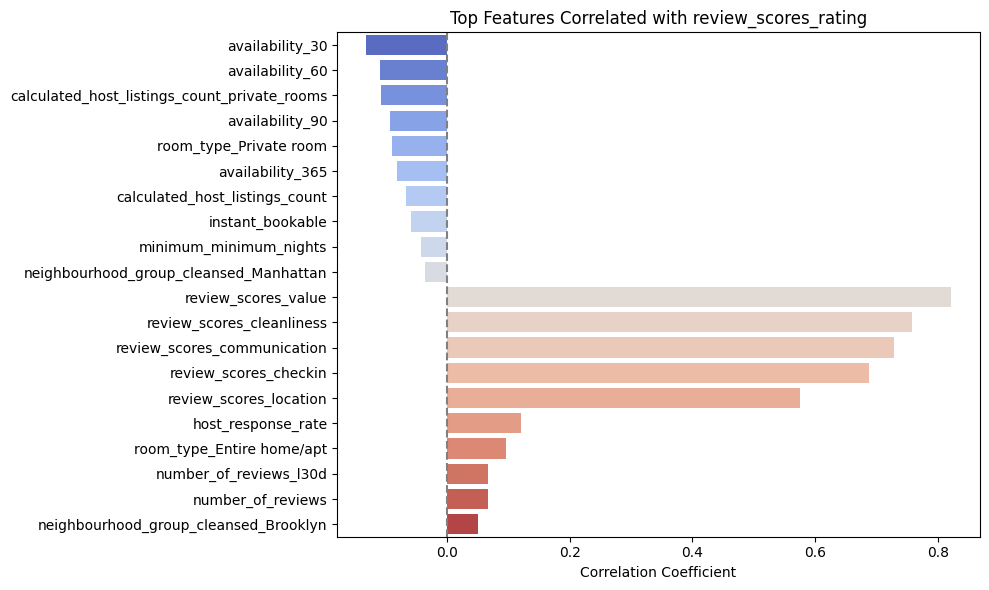

In [26]:
top_positive = target_corr.sort_values(ascending=False).head(10)

# Top 10 most negatively correlated
top_negative = target_corr.sort_values().head(10)

# Combine them
top_combined = pd.concat([top_negative, top_positive])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_combined.values, y=top_combined.index, palette='coolwarm')
plt.title('Top Features Correlated with review_scores_rating')
plt.xlabel('Correlation Coefficient')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


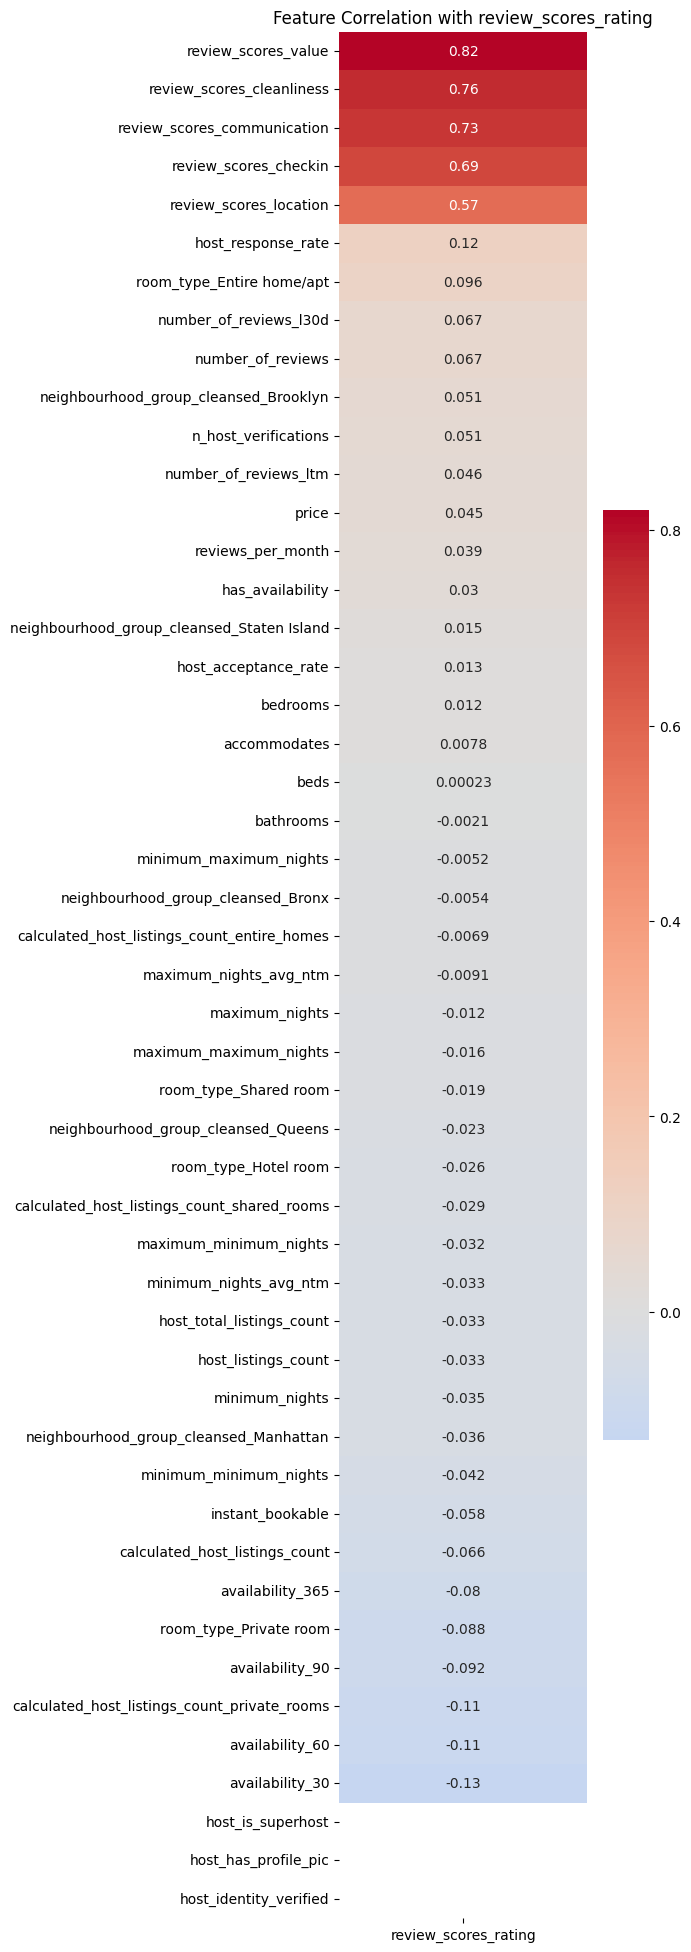

In [27]:
plt.figure(figsize=(4, len(target_corr) / 2))
sns.heatmap(target_corr.to_frame(), annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation with review_scores_rating")
plt.show()


# 1. Feature Selection
After analyzing the correlation between features and the target variable, I selected the top 10 features most highly correlated with the target. These features are expected to contribute the most predictive power to the model. 
### Features kept (Top 10 most correlated with label):
- review_scores_value                     
- review_scores_cleanliness                
- review_scores_communication              
- review_scores_checkin                    
- review_scores_location                  
- host_response_rate                       
- room_type_Entire home/apt                
- number_of_reviews_l30d                   
- number_of_reviews                        
- neighbourhood_group_cleansed_Brooklyn
### Features Removed (features with low correlation with label or high inter feature relationship)

* `availability_30`: -0.130953
* `availability_60`: -0.108681
* `calculated_host_listings_count_private_rooms`: -0.107384
* `availability_90`: -0.092216
* `room_type_Private room`: -0.088418
* `availability_365`: -0.080430
* `calculated_host_listings_count`: -0.066378
* `instant_bookable`: -0.058469
* `minimum_minimum_nights`: -0.042011
* `neighbourhood_group_cleansed_Manhattan`: -0.035686
* `minimum_nights`: -0.034514
* `host_listings_count`: -0.033200
* `host_total_listings_count`: -0.033200
* `minimum_nights_avg_ntm`: -0.032653
* `maximum_minimum_nights`: -0.032373
* `calculated_host_listings_count_shared_rooms`: -0.029324
* `room_type_Hotel room`: -0.025586
* `neighbourhood_group_cleansed_Queens`: -0.022995
* `room_type_Shared room`: -0.019015
* `maximum_maximum_nights`: -0.015691
* `maximum_nights`: -0.012175
* `maximum_nights_avg_ntm`: -0.009140
* `calculated_host_listings_count_entire_homes`: -0.006858
* `neighbourhood_group_cleansed_Bronx`: -0.005404
* `minimum_maximum_nights`: -0.005249
* `bathrooms`: -0.002080
* `beds`: 0.000233
* `accommodates`: 0.007798
* `bedrooms`: 0.011528
* `host_acceptance_rate

# 2. Data Preparation Techniques
* Missing Value Handling: Fill missing numerical values with the median and categorical with the mode 
* One-Hot Encoding: Apply to categorical features using sklearn one hot encoder (did his during data exploratory analysis)
* Feature Scaling: Standardize numerical features using StandardScaler for models that are sensitive to feature scale 
* Train-Test Split: Use train_test_split from sklearn.model_selection to divide data into training and testing sets (e.g., 80/20 split).
* Feature Selection: Use correlation or SelectKBest for dimensionality reduction to retain only the most important features.
* Train-Test Split:Split the dataset into X_train, X_test, y_train, y_test using an 80-20 or 70-30 ratio.


# 3. Model Selection
I will use two models for comparison:

- Linear Regression (simple, interpretable baseline)

- Random Forest Regressor (robust non-linear model)

These models will help me evaluate both a linear and a more flexible, ensemble-based approach.

# 4. Model Training and Evaluation Plan
### Train Models:

-  Use the training data (X_train, y_train) to fit both models.
-  use sklearn linear regression
- For Random Forest, use sklearn.ensemble.RandomForestRegressor
### Make Predictions:
Predict review scores on the test set (X_test).
### Evaluate Performance:

Use Root Mean Squared Error (RMSE) and r2 score as the main evaluation metric.

Visualize predicted vs actual values using scatter plots
### Further Improvements

Tune Random Forest hyperparameters (e.g., n_estimators, max_depth)

Use cross-validation to better estimate generalization performance




  



## import packages

In [28]:
 # Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats



# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




#saving model 
import pickle


### Data Preparation

In [29]:
new_features = corr_matrix['review_scores_rating'].drop('review_scores_rating').sort_values(ascending=False).head(10).index.tolist()

new_features

['review_scores_value',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_checkin',
 'review_scores_location',
 'host_response_rate',
 'room_type_Entire home/apt',
 'number_of_reviews_l30d',
 'number_of_reviews',
 'neighbourhood_group_cleansed_Brooklyn']

In [30]:
columns = new_features + ['review_scores_rating']
df = df[columns]

print(df.columns)

df.head(10)


Index(['review_scores_value', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_location', 'host_response_rate',
       'room_type_Entire home/apt', 'number_of_reviews_l30d',
       'number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn',
       'review_scores_rating'],
      dtype='object')


review_scores_value  review_scores_cleanliness  \
0                 4.41                       4.62   
1                 4.64                       4.49   
2                 5.00                       5.00   
3                 4.36                       3.73   
4                 4.92                       4.82   
5                 4.73                       4.61   
6                 4.57                       4.86   
7                 4.84                       4.96   
8                 5.00                       4.86   
9                 4.78                       4.90   

   review_scores_communication  review_scores_checkin  review_scores_location  \
0                         4.79                   4.76                    4.86   
1                         4.80                   4.78                    4.71   
2                         5.00                   5.00                    4.50   
3                         4.42                   4.66                    4.87   
4                         4.95                   4.97                    4.94   
5                         4.82                   4.79                    4.87   
6                         4.80                   4.84                    4.67   
7                         4.95                   4.96                    4.84   
8                         5.00                   5.00                    5.00   
9                         4.91                   4.96                    4.93   

   host_response_rate  room_type_Entire home/apt  number_of_reviews_l30d  \
0                0.80                        1.0                       0   
1                0.09                        1.0                       0   
2                1.00                        1.0                       0   
3                1.00                        0.0                       2   
4                 NaN                        0.0                       0   
5                1.00                        0.0                       2   
6                1.00                        1.0                       0   
7                1.00                        0.0                       0   
8                1.00                        0.0                       0   
9                1.00                        1.0                       3   

   number_of_reviews  neighbourhood_group_cleansed_Brooklyn  \
0                 48                                    0.0   
1                409                                    1.0   
2                  2                                    1.0   
3                507                                    0.0   
4                118                                    0.0   
5                204                                    1.0   
6                181                                    1.0   
7                234                                    0.0   
8                  9                                    1.0   
9                280                                    1.0   

   review_scores_rating  
0                  4.70  
1                  4.45  
2                  5.00  
3                  4.21  
4                  4.91  
5                  4.70  
6                  4.56  
7                  4.88  
8                  4.86  
9                  4.87

# Data Cleaning

#### a. Handle Outliers
Handle outliers in the label column



In [31]:
df['label_reviews'] = stats.mstats.winsorize(df['review_scores_rating'], limits=[0.01, 0.01])


In [32]:
# drop the original review_scores_rating from the 
df.drop(columns=['review_scores_rating'], inplace=True)

df.columns


Index(['review_scores_value', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_location', 'host_response_rate',
       'room_type_Entire home/apt', 'number_of_reviews_l30d',
       'number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn',
       'label_reviews'],
      dtype='object')

#### b. Handle Missing Data


In [33]:
nan_count = np.sum(df.isnull(),  axis = 0)
nan_count

review_scores_value                          0
review_scores_cleanliness                    0
review_scores_communication                  0
review_scores_checkin                        0
review_scores_location                       0
host_response_rate                       11843
room_type_Entire home/apt                    0
number_of_reviews_l30d                       0
number_of_reviews                            0
neighbourhood_group_cleansed_Brooklyn        0
label_reviews                                0
dtype: int64

In [34]:
nan_detected = nan_count.values > 0
nan_detected

array([False, False, False, False, False,  True, False, False, False,
       False, False])

In [35]:
to_impute = df.columns[nan_detected]
to_impute



Index(['host_response_rate'], dtype='object')

In [36]:
for col in to_impute.tolist():
    col_mean = df[col].mean()
    df[col].fillna(value=col_mean, inplace=True)


In [37]:
nan_count = np.sum(df.isnull(),  axis = 0)
nan_count

review_scores_value                      0
review_scores_cleanliness                0
review_scores_communication              0
review_scores_checkin                    0
review_scores_location                   0
host_response_rate                       0
room_type_Entire home/apt                0
number_of_reviews_l30d                   0
number_of_reviews                        0
neighbourhood_group_cleansed_Brooklyn    0
label_reviews                            0
dtype: int64

#### Perform one hot encoding (did this during data exploration)

In [38]:
df.dtypes

review_scores_value                      float64
review_scores_cleanliness                float64
review_scores_communication              float64
review_scores_checkin                    float64
review_scores_location                   float64
host_response_rate                       float64
room_type_Entire home/apt                float64
number_of_reviews_l30d                     int64
number_of_reviews                          int64
neighbourhood_group_cleansed_Brooklyn    float64
label_reviews                            float64
dtype: object

# Model Development

#### a. Create Labled Examples

In [51]:
y = df['label_reviews']

X = df[new_features]

print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))
print(str(list(X.columns)))

Number of examples: 28022

Number of Features:10
['review_scores_value', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_checkin', 'review_scores_location', 'host_response_rate', 'room_type_Entire home/apt', 'number_of_reviews_l30d', 'number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn']


#### b. Create Training and Test Data Sets

In [40]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.30, random_state=1234)

print(X_train.shape)
print(X_test.shape)


(19615, 10)
(8407, 10)


### c. Perform Additional Feature Selection


In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=20)
selector.fit(X, y)
filter = selector.get_support()
top_10_features = X.columns[filter]

print("Best 10 features:")
print(top_10_features)

Best 10 features:
Index(['review_scores_value', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_checkin',
       'review_scores_location', 'host_response_rate',
       'room_type_Entire home/apt', 'number_of_reviews_l30d',
       'number_of_reviews', 'neighbourhood_group_cleansed_Brooklyn'],
      dtype='object')


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(


The features returned by SelectKBest matches the initial features selected from the correlation matrix, thereby there is no need to change the features

# Linear Model

### scale the training data

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Linear Model

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_r2_score = r2_score(y_test, y_pred)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2_score)





RMSE: 0.23271101306672123
R2 Score: 0.7434554458457073


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Analysis

- The model’s predictions are on average about 0.23 units away from the actual values (rmse). This means the model does a pretty good job predicting the outcome, with small typical errors.

- The model explains roughly 74% of the variation in the data (r 2 score). About three-quarters of the differences you see in the outcome can be accounted for by the features the model is using.

- This shows the model has learned meaningful relationships in the data and can make fairly accurate predictions.
- However, about 26% of the variation is still unexplained, which means there are factors the model didn’t capture or some noise in the data.

### Visualize predicted Value vs Actual value

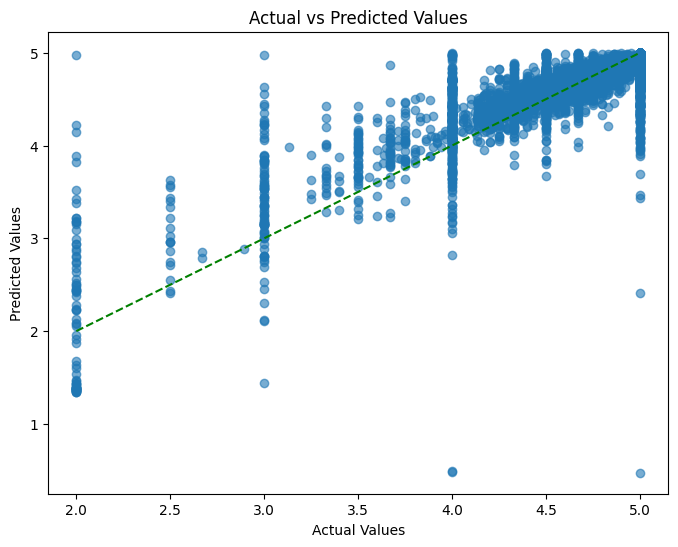

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Random Forest Model


In [44]:
# create model
basic_rf_model = RandomForestRegressor()

# fit the model
basic_rf_model.fit(X_train, y_train)

# make prediction
y_rf_pred = basic_rf_model.predict(X_test)

#evaluation
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

rf_r2 = r2_score(y_test, y_rf_pred)


print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2)) 


[RF] Root Mean Squared Error: 0.2236685323552256
[RF] R2: 0.7630052625067546


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Analysis

RMSE of 0.224 means that, on average, the random forest model’s predictions deviate from the true target values by about 0.224 units. This suggests that the Random Forest model’s predictions are quite close to the actual values. The lower the RMSE, the better the model’s predictive accuracy.

R2 of 0.763 means that approximately 76.3% of the variance in the target variable is explained by the Random Forest model. This indicates a strong predictive relationship between the input features and the output.

### Use cross validation with GridSearch to find  optimal hyperparameters

In [45]:
print("running grid search. This will take a while")
param_grid = {
    'max_depth': [2, 4, 16, 24],        
    'n_estimators': [100, 200, 300, 400]  
}

grid_search = GridSearchCV(basic_rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit to  training data 
grid_search.fit(X_train, y_train)

rf_best_params = grid_search.best_params_

# Output the best parameters and best score

best_depth = rf_best_params['max_depth']
best_n_est = rf_best_params['n_estimators']
print("Best max_depth:", best_depth)
print("Best n_estimators:", best_n_est)
print('done')


running grid search. This will take a while
Best max_depth: 16
Best n_estimators: 400
Best score: -0.04960796523869682
done


In [46]:
rf_model_best = RandomForestRegressor(max_depth=best_depth, n_estimators=best_n_est)

rf_model_best.fit(X_train, y_train)

# make prediction
y_rf_pred_best = rf_model_best.predict(X_test)

#evaluation
rf_rmse_best = mean_squared_error(y_test, y_rf_pred_best, squared=False)

rf_r2_best = r2_score(y_test, y_rf_pred_best)


print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse_best))
print('[RF] R2: {0}'.format(rf_r2_best)) 




[RF] Root Mean Squared Error: 0.22102837848826123
[RF] R2: 0.7685671509919744


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Analysis
RMSE of the optimized model dropped slightly from 0.224 to 0.221. The predictions are now on average a bit closer to the true values.

R2 increased from 0.763 to 0.769, so the tuned model explains about 0.6% more variance in the target variable than the default model. 
This shows the hyperparameter tuning helped the model capture patterns in the data more effectively.

Overal, the Random Forest model with tuning have the best results since its r2 score is the highest and the rmse is the lowest

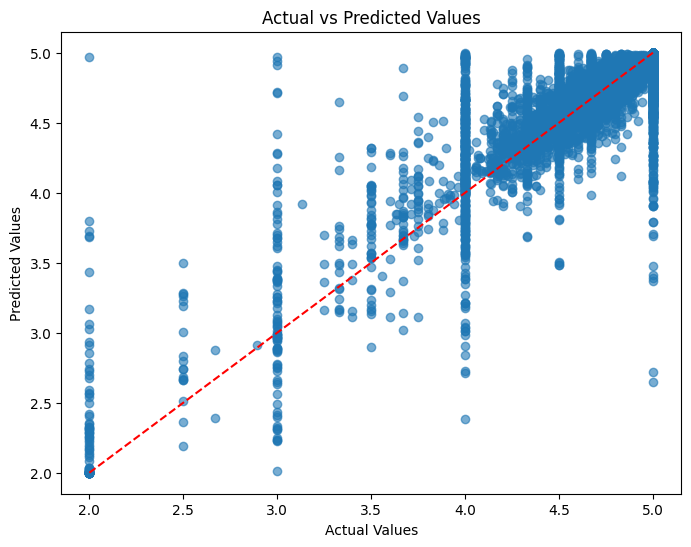

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_rf_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# model comparison and scoring

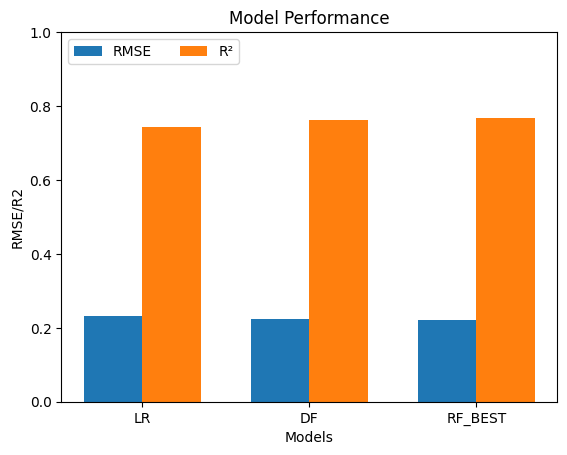

In [49]:

# Given data
RMSE_Results = [lr_rmse, rf_rmse, rf_rmse_best]
R2_Results = [lr_r2_score, rf_r2, rf_r2_best]

rg = np.arange(3)
width = 0.35

# 1. Create bar plot with RMSE results
plt.bar(rg, RMSE_Results, width=width, label='RMSE')

# 2. Create bar plot with R2 results
plt.bar(rg + width, R2_Results, width=width, label='R²')

# Labels and formatting
labels = ['LR', 'DF', 'RF_BEST']
plt.xticks(rg + width / 2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0, 1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()



# Save Model

In [ ]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(rf_model_best, file)